In [328]:
# Libraries for Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-Processing & Model Selection Libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder

## Feature Selection Library
from sklearn.feature_selection import SelectKBest , chi2

## Libraries for ML Models
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

## Model Evaluation Libraries
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

## Warnings Libraries
import warnings
warnings.filterwarnings('ignore')

In [329]:
# Loading the New Extended Dataset
df=pd.read_csv("bank_transactions_expanded.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,Transaction Duration,Login Attempts,Account Balance,PreviousTransaction Date
0,TX000001,AC00128,14.09,11-04-2023 16:29,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,04-11-2024 08:08
1,TX000002,AC00455,376.24,27-06-2023 16:44,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,04-11-2024 08:09
2,TX000003,AC00019,126.29,10-07-2023 18:16,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,04-11-2024 08:07
3,TX000004,AC00070,184.50,05-05-2023 16:32,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,04-11-2024 08:09
4,TX000005,AC00411,13.45,16-10-2023 17:51,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,04-11-2024 08:06


In [330]:
# Check Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TransactionID             10000 non-null  object 
 1   AccountID                 10000 non-null  object 
 2   TransactionAmount         10000 non-null  float64
 3   TransactionDate           10000 non-null  object 
 4   TransactionType           10000 non-null  object 
 5   Location                  10000 non-null  object 
 6   DeviceID                  10000 non-null  object 
 7   IP Address                10000 non-null  object 
 8   MerchantID                10000 non-null  object 
 9   Channel                   10000 non-null  object 
 10  CustomerAge               10000 non-null  int64  
 11  CustomerOccupation        10000 non-null  object 
 12  Transaction Duration      10000 non-null  int64  
 13  Login Attempts            10000 non-null  int64  
 14  Account

In [331]:
# Describing the Dataset
df.describe()

,TransactionAmount,CustomerAge,Transaction Duration,Login Attempts,Account Balance
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,332.496200,48.145200,146.162400,2.563600,5362.069206
std,252.788026,18.211482,81.904566,1.514591,3532.097326
min,0.100000,18.000000,10.000000,1.000000,0.510000
25%,127.487500,32.000000,76.000000,1.000000,2370.370000
50%,286.680000,49.000000,142.000000,2.000000,5051.815000
75%,487.847500,63.000000,213.000000,4.000000,7762.037500
max,1919.110000,80.000000,300.000000,5.000000,18885.660000


In [332]:
# Check for Null Values......
df.isnull().sum()

TransactionID               0
AccountID                   0
TransactionAmount           0
TransactionDate             0
TransactionType             0
Location                    0
DeviceID                    0
IP Address                  0
MerchantID                  0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
Transaction Duration        0
Login Attempts              0
Account Balance             0
PreviousTransaction Date    0
dtype: int64

In [333]:
# Checking Duplicated Values
df.duplicated().sum()

0

In [334]:
# Data Conversion
df["TransactionDate"]= pd.to_datetime(df['TransactionDate'] , format='%d-%m-%Y %H:%M' ,errors= 'coerce')
df["PreviousTransaction Date"] = pd.to_datetime(df['PreviousTransaction Date'] , format = '%d-%m-%Y %H:%M' , errors= 'coerce')
df[['TransactionDate' , 'PreviousTransaction Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransactionDate           10000 non-null  datetime64[ns]
 1   PreviousTransaction Date  10000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 156.4 KB


Observations

After performing the check, no missing or duplicated values were found in the dataset. This indicates that the data is complete and consistent, and no further cleaning is needed regarding missing or duplicate entries.

In [335]:
df[['TransactionDate', 'PreviousTransaction Date']].head(10)

,TransactionDate,PreviousTransaction Date
0,2023-04-11 16:29:00,2024-11-04 08:08:00
1,2023-06-27 16:44:00,2024-11-04 08:09:00
2,2023-07-10 18:16:00,2024-11-04 08:07:00
3,2023-05-05 16:32:00,2024-11-04 08:09:00
4,2023-10-16 17:51:00,2024-11-04 08:06:00
5,2023-04-03 17:15:00,2024-11-04 08:06:00
6,2023-02-15 16:36:00,2024-11-04 08:10:00
7,2023-05-08 17:47:00,2024-11-04 08:10:00
8,2023-03-21 16:59:00,2024-11-04 08:11:00
9,2023-03-31 16:06:00,2024-11-04 08:06:00


In [336]:
df['TransactionDate'].astype(str).unique()[:10]

array(['2023-04-11 16:29:00', '2023-06-27 16:44:00',
       '2023-07-10 18:16:00', '2023-05-05 16:32:00',
       '2023-10-16 17:51:00', '2023-04-03 17:15:00',
       '2023-02-15 16:36:00', '2023-05-08 17:47:00',
       '2023-03-21 16:59:00', '2023-03-31 16:06:00'], dtype=object)

In [337]:
# Calculating the Time Difference Between "TransactionDate" & "PreviousTransaction Date" Columns

df['TimeDifferenceMinutes'] = (df['PreviousTransaction Date'] - df['TransactionDate']).dt.total_seconds()/60
df['TimeDifferenceMinutes'].head(10000)

0       824619.0
1       713725.0
2       694911.0
3       790057.0
4       553815.0
          ...   
9995     18438.0
9996    191751.0
9997     35407.0
9998   -169628.0
9999     67063.0
Name: TimeDifferenceMinutes, Length: 10000, dtype: float64

In [338]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,Transaction Duration,Login Attempts,Account Balance,PreviousTransaction Date,TimeDifferenceMinutes
0,TX000001,AC00128,14.09,2023-04-11 16:29:00,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:00,824619.0
1,TX000002,AC00455,376.24,2023-06-27 16:44:00,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:00,713725.0
2,TX000003,AC00019,126.29,2023-07-10 18:16:00,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:00,694911.0
3,TX000004,AC00070,184.50,2023-05-05 16:32:00,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:00,790057.0
4,TX000005,AC00411,13.45,2023-10-16 17:51:00,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:00,553815.0


# We are performing Supervised ML model to find the Fradulent transcations in our dataset

Here we are taking a synthetic column name Fradulant to find out wheather the given transcations are fradulent are not. If they are Fradulent how much percentage of the transcations are fradulent. Here we are going on a rule based approach in which we are setting few Rules for fradulent transcations such as multiple transcations that are happening within less time in multiple devices, locations and IP addresses which is not practically possible. And mostly Fraud can happen for the people who are holding good amount in their account and also if there is any huge transcation going on they might be a chance of fruad. We have combine all these scenarios and framed some rules in such a manner that that newly added column can recognize the fraud to some extent. Here 0 means no fraud and 1 means Fraud happended.

In [339]:
# Function to define fraudulent column
import pandas as pd

#  Create Previous fields based on AccountID's last transaction
df['PreviousDeviceID'] = df.groupby('AccountID')['DeviceID'].shift(1)
df['PreviousLocation'] = df.groupby('AccountID')['Location'].shift(1)
df['PreviousIP'] = df.groupby('AccountID')['IP Address'].shift(1)

# Fraud detection function with your rules
def detect_fraud(df):
    amount = df['TransactionAmount']
    balance = df['Account Balance']
    time_diff = df['TimeDifferenceMinutes']
    login_attempts = df['Login Attempts']
    
    # Handle NaN values when comparing previous device, location, and IP
    device_change = False if pd.isna(df['PreviousDeviceID']) else df['DeviceID'] != df['PreviousDeviceID']
    location_change = False if pd.isna(df['PreviousLocation']) else df['Location'] != df['PreviousLocation']
    ip_change = False if pd.isna(df['PreviousIP']) else df['IP Address'] != df['PreviousIP']
    
    # Extract the hour from the transaction time and to handle NAN as well
    hour = df['TransactionDate'].hour if pd.notna(df['TransactionDate']) else -1 

    # Rule 1: High Account Balance and suspicious changes in Device, Location, and IP
    if balance > 10000 and (device_change or location_change or ip_change) and time_diff < 60:
        return 1

    # Rule 2: High Account Balance and multiple high-value transactions in a short period
    if balance > 10000 and amount > 500 and time_diff < 60:
        return 1

    # Rule 3: High Account Balance, large transaction amount, and suspicious behavior
    if balance > 10000 and amount > 1000 and time_diff < 60:
        return 1

    # Rule 4: High Account Balance and login attempts >= 3, suggesting possible unauthorized access
    if balance > 10000 and login_attempts >= 3:
        return 1

    # Rule 5: Unusual time (late hours) + high account balance + high transaction amount
    if balance > 10000 and amount > 1000 and (hour < 6 or hour > 22):
        return 1
    
    # Rule 6: High login attempts + high transaction amount and suspicious changes in Device, Location, and IP
    if balance > 10000 and login_attempts >= 3 and (device_change or location_change or ip_change):
        return 1

    # Rule 7: High transaction amount, and suspicious changes in Device, Location, and IP
    if amount > 5000 and login_attempts >= 3 and (device_change or location_change or ip_change):
        return 1

    # Rule 8: Multiple login attempts and high transaction amount
    if login_attempts >= 3 and amount > 500:
        return 1
    
    return 0  # If no fraud detected

# Ensure 'TransactionDate' is converted to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Step 3: Apply the fraud detection function to each row
df['Fraudulent'] = df.apply(detect_fraud, axis=1)


In [340]:
# Show the DataFrame with the 'Fraudulent' column
print(df[['TransactionID', 'Fraudulent']]) 

     TransactionID  Fraudulent
0         TX000001           0
1         TX000002           0
2         TX000003           0
3         TX000004           0
4         TX000005           0
...            ...         ...
9995      TX009996           1
9996      TX009997           0
9997      TX009998           0
9998      TX009999           1
9999      TX010000           1

[10000 rows x 2 columns]


In [341]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,Transaction Duration,Login Attempts,Account Balance,PreviousTransaction Date,TimeDifferenceMinutes,PreviousDeviceID,PreviousLocation,PreviousIP,Fraudulent
0,TX000001,AC00128,14.09,2023-04-11 16:29:00,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,Doctor,81,1,5112.21,2024-11-04 08:08:00,824619.0,NaN,NaN,NaN,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:00,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,Doctor,141,1,13758.91,2024-11-04 08:09:00,713725.0,NaN,NaN,NaN,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:00,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,Student,56,1,1122.35,2024-11-04 08:07:00,694911.0,NaN,NaN,NaN,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:00,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,Student,25,1,8569.06,2024-11-04 08:09:00,790057.0,NaN,NaN,NaN,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:00,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,Student,198,1,7429.40,2024-11-04 08:06:00,553815.0,NaN,NaN,NaN,0


In [342]:
df.describe()    # To see the Synthetic Column 'fraudulent' in dataset in the below output

,TransactionAmount,TransactionDate,CustomerAge,Transaction Duration,Login Attempts,Account Balance,PreviousTransaction Date,TimeDifferenceMinutes,Fraudulent
count,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000.000000
mean,332.496200,2023-07-03 18:59:45.569999872,48.145200,146.162400,2.563600,5362.069206,2023-11-02 16:32:59.376000,175533.230100,0.170200
min,0.100000,2023-01-01 00:42:00,18.000000,10.000000,1.000000,0.510000,2023-01-01 00:03:00,-516978.000000,0.000000
25%,127.487500,2023-04-03 03:48:30,32.000000,76.000000,1.000000,2370.370000,2023-05-01 09:59:45,-99799.250000,0.000000
50%,286.680000,2023-07-04 06:38:30,49.000000,142.000000,2.000000,5051.815000,2023-09-01 18:09:00,94847.000000,0.000000
75%,487.847500,2023-10-04 10:56:30,63.000000,213.000000,4.000000,7762.037500,2024-11-04 08:06:00,460252.250000,0.000000
max,1919.110000,2024-01-01 18:21:00,80.000000,300.000000,5.000000,18885.660000,2024-11-04 08:12:00,967211.000000,1.000000
std,252.788026,NaN,18.211482,81.904566,1.514591,3532.097326,NaN,366619.752623,0.375827


In [343]:
# Finding / Identifying the Categorical Columns In the dataset "bank_transactions_expanded-Capstone Project"

categorical_columns = df.select_dtypes(include =['object']).columns.tolist()
print("Categorical Columns in Dataset are =", categorical_columns)

Categorical Columns in Dataset are = ['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousDeviceID', 'PreviousLocation', 'PreviousIP']


Categorical Columns in Dataset are 'TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransaction Date

In [344]:
# Finding / Identifying the Numerical Columns In the dataset "bank_transactions_expanded-Capstone Project"

numerical_columns = df.select_dtypes(include=['int64' , 'float64']).columns.tolist()
print("Numerical Columns in Dataset are =" , numerical_columns)

Numerical Columns in Dataset are = ['TransactionAmount', 'CustomerAge', 'Transaction Duration', 'Login Attempts', 'Account Balance', 'TimeDifferenceMinutes', 'Fraudulent']


Numerical Columns in Dataset are 'TransactionAmount', 'CustomerAge', 'Transaction Duration', 'Login Attempts', 'Account Balance', 'TimeDifferenceMinutes','Fraudulent'

In [345]:
# Finding Unique & Null Values in Categorical Columns

print("Unique values in Categorical Columns:")
for col in categorical_columns:
    print(f"Unique values in {col}:, {df[col].nunique()}")

Unique values in Categorical Columns:
Unique values in TransactionID:, 10000
Unique values in AccountID:, 495
Unique values in TransactionType:, 2
Unique values in Location:, 43
Unique values in DeviceID:, 681
Unique values in IP Address:, 592
Unique values in MerchantID:, 100
Unique values in Channel:, 3
Unique values in CustomerOccupation:, 4
Unique values in PreviousDeviceID:, 681
Unique values in PreviousLocation:, 43
Unique values in PreviousIP:, 592


In [346]:
# Finding Unique & Null Values in Numerical Columns

print("\nUnique values in Numerical Columns:")
for col in numerical_columns:
    print(f"Unique Values in {col}: {df[col].nunique()}")


Unique values in Numerical Columns:
Unique Values in TransactionAmount: 9355
Unique Values in CustomerAge: 63
Unique Values in Transaction Duration: 288
Unique Values in Login Attempts: 5
Unique Values in Account Balance: 9963
Unique Values in TimeDifferenceMinutes: 9850
Unique Values in Fraudulent: 2


##  Observation: Unique Values in the Dataset

###  Categorical Columns
- **TransactionID**: 10,000 unique values – each transaction is uniquely recorded.
- **AccountID**: 495 unique customers – multiple transactions per customer.
- **TransactionType**: 2 values (likely "Debit" and "Credit").
- **Location**: 43 unique values – moderate geographic diversity.
- **DeviceID**: 681 unique devices – wide range of device usage.
- **IP Address**: 592 unique values – high variability in network usage.
- **MerchantID**: 100 unique merchants – diverse set of vendors.
- **Channel**: 3 values (e.g., Online, ATM, Branch).
- **CustomerOccupation**: 4 categories – limited segmentation.
- **PreviousTransaction Date**: 9,782 unique values – nearly unique timestamps.
- **PreviousDeviceID**: 681 – mirrors current `DeviceID`.
- **PreviousLocation**: 43 – mirrors current `Location`.
- **PreviousIP**: 592 – mirrors current `IP Address`.

###  Numerical Columns
- **TransactionAmount**: 9,355 unique values – highly granular.
- **CustomerAge**: 448 values – sufficient variation.
- **Transaction Duration**: 288 values – moderate variability.
- **Login Attempts**: 5 values – possibly capped or frequently repeated.
- **Account Balance**: 9,963 unique values – highly granular.
- **TimeDifferenceMinutes**: 9,823 values – useful for time-based behavior analysis.
- **Fraudulent**: 2 values – confirms binary classification target.


In [347]:
# Finding the Null Values:

df.isnull().sum()

TransactionID                 0
AccountID                     0
TransactionAmount             0
TransactionDate               0
TransactionType               0
Location                      0
DeviceID                      0
IP Address                    0
MerchantID                    0
Channel                       0
CustomerAge                   0
CustomerOccupation            0
Transaction Duration          0
Login Attempts                0
Account Balance               0
PreviousTransaction Date      0
TimeDifferenceMinutes         0
PreviousDeviceID            495
PreviousLocation            495
PreviousIP                  495
Fraudulent                    0
dtype: int64

In [348]:
# Fill null values in specified columns with placeholder values
df['PreviousDeviceID'] = df['PreviousDeviceID'].fillna('UnknownDevice')
df['PreviousLocation'] = df['PreviousLocation'].fillna('UnknownLocation')
df['PreviousIP'] = df['PreviousIP'].fillna('UnknownIP')

# Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransactionID             10000 non-null  object        
 1   AccountID                 10000 non-null  object        
 2   TransactionAmount         10000 non-null  float64       
 3   TransactionDate           10000 non-null  datetime64[ns]
 4   TransactionType           10000 non-null  object        
 5   Location                  10000 non-null  object        
 6   DeviceID                  10000 non-null  object        
 7   IP Address                10000 non-null  object        
 8   MerchantID                10000 non-null  object        
 9   Channel                   10000 non-null  object        
 10  CustomerAge               10000 non-null  int64         
 11  CustomerOccupation        10000 non-null  object        
 12  Transaction Duratio

In [349]:
df.isnull().sum()

TransactionID               0
AccountID                   0
TransactionAmount           0
TransactionDate             0
TransactionType             0
Location                    0
DeviceID                    0
IP Address                  0
MerchantID                  0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
Transaction Duration        0
Login Attempts              0
Account Balance             0
PreviousTransaction Date    0
TimeDifferenceMinutes       0
PreviousDeviceID            0
PreviousLocation            0
PreviousIP                  0
Fraudulent                  0
dtype: int64

No Missing Values or Null values in Dataset

In [350]:
 # Checking Unique Values in Categorical Columns

categorical_columns = ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransaction Date']

for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
    print("\n")

Unique values in TransactionID: ['TX000001' 'TX000002' 'TX000003' ... 'TX009998' 'TX009999' 'TX010000']


Unique values in AccountID: ['AC00128' 'AC00455' 'AC00019' 'AC00070' 'AC00411' 'AC00393' 'AC00199'
 'AC00069' 'AC00135' 'AC00385' 'AC00150' 'AC00459' 'AC00392' 'AC00264'
 'AC00085' 'AC00270' 'AC00317' 'AC00359' 'AC00242' 'AC00285' 'AC00002'
 'AC00014' 'AC00095' 'AC00453' 'AC00241' 'AC00041' 'AC00441' 'AC00057'
 'AC00390' 'AC00313' 'AC00367' 'AC00291' 'AC00060' 'AC00365' 'AC00267'
 'AC00404' 'AC00202' 'AC00478' 'AC00405' 'AC00421' 'AC00480' 'AC00120'
 'AC00117' 'AC00011' 'AC00401' 'AC00282' 'AC00439' 'AC00296' 'AC00471'
 'AC00159' 'AC00482' 'AC00115' 'AC00055' 'AC00419' 'AC00374' 'AC00271'
 'AC00456' 'AC00143' 'AC00427' 'AC00438' 'AC00425' 'AC00325' 'AC00434'
 'AC00319' 'AC00460' 'AC00461' 'AC00395' 'AC00217' 'AC00053' 'AC00110'
 'AC00265' 'AC00239' 'AC00007' 'AC00022' 'AC00464' 'AC00406' 'AC00445'
 'AC00236' 'AC00220' 'AC00140' 'AC00098' 'AC00303' 'AC00373' 'AC00437'
 'AC00106' 'AC

In [351]:
# Checking Unique Values in Numerical Columns
numerical_columns = ['TransactionAmount', 'CustomerAge', 'Transaction Duration', 'Login Attempts', 'Account Balance', 'TimeDifferenceMinutes', 'Fraudulent']
for col in numerical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")
    print("\n")


Unique values in TransactionAmount: [ 14.09 376.24 126.29 ... 280.52 592.16 696.95]


Unique values in CustomerAge: [70 68 19 26 18 37 67 51 55 52 21 24 36 39 59 71 38 22 65 23 44 27 29 49
 45 75 66 63 57 74 41 69 28 62 25 48 46 79 56 50 42 60 32 35 20 58 34 54
 64 53 30 78 40 47 43 33 80 77 61 31 76 73 72]


Unique values in Transaction Duration: [ 81 141  56  25 198 172 139 291  86 120  59 173 111 123 134 129 158 234
 106 169  38  93 142  96 276  95 197 283  20 257 168 150  50  45 145 137
  90 216 119  19 116 117  33  75 105 138 175 121 264  83  52  61  28  51
 152 227 226 104 124 186 225 128  16 103 220 135  55 280  24 113  69  77
  67 102  80  87 170 157  30 115 179 100  34 260  72 127 185  78 133 167
 164 146 235  17  35 147  73 180 174 282 107  47 122  62 165  91  41 247
 108 144  40 273 254  68  18 118 246  21 294 166  92 296 293 160 265 245
 171  99 177 285  53 125 268 162  36 109  43  14  46  54  82 201 299  57
 101 132 131  32 236 161 151  63 143 214 149 202  42  37  15  64 2

# Exploratory Data Analysis [EDA] & Visualisation

In this section, we explore the dataset using univariate, bivariate, and multivariate analyses to uncover patterns, trends, and relationships. 
This comprehensive approach helps us understand the data's distribution, interactions between variables, and overall structure, which is essential for identifying potential features for fraud detection.
Key EDA Tasks:

# Univariate Analysis:

Examine individual variables using histograms, boxplots, and density plots to assess distributions, detect outliers, and evaluate skewness.
Bivariate Analysis:

Explore relationships between two variables through scatterplots, bar charts, and correlation metrics to identify potential associations and dependencies.
Multivariate Analysis:

Investigate interactions among multiple variables using pair plots, heatmaps, and other advanced visualization techniques to uncover complex relationships.

By executing these tasks, we obtain a deep understanding of the dataset, paving the way for effective data modeling and fraud detection.

Univariate Analysis

Numerical Columns

We are not using Account ID and Transaction ID because they are not relevant in this analysis

In [352]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Checking Outliers in Numerical Columns:

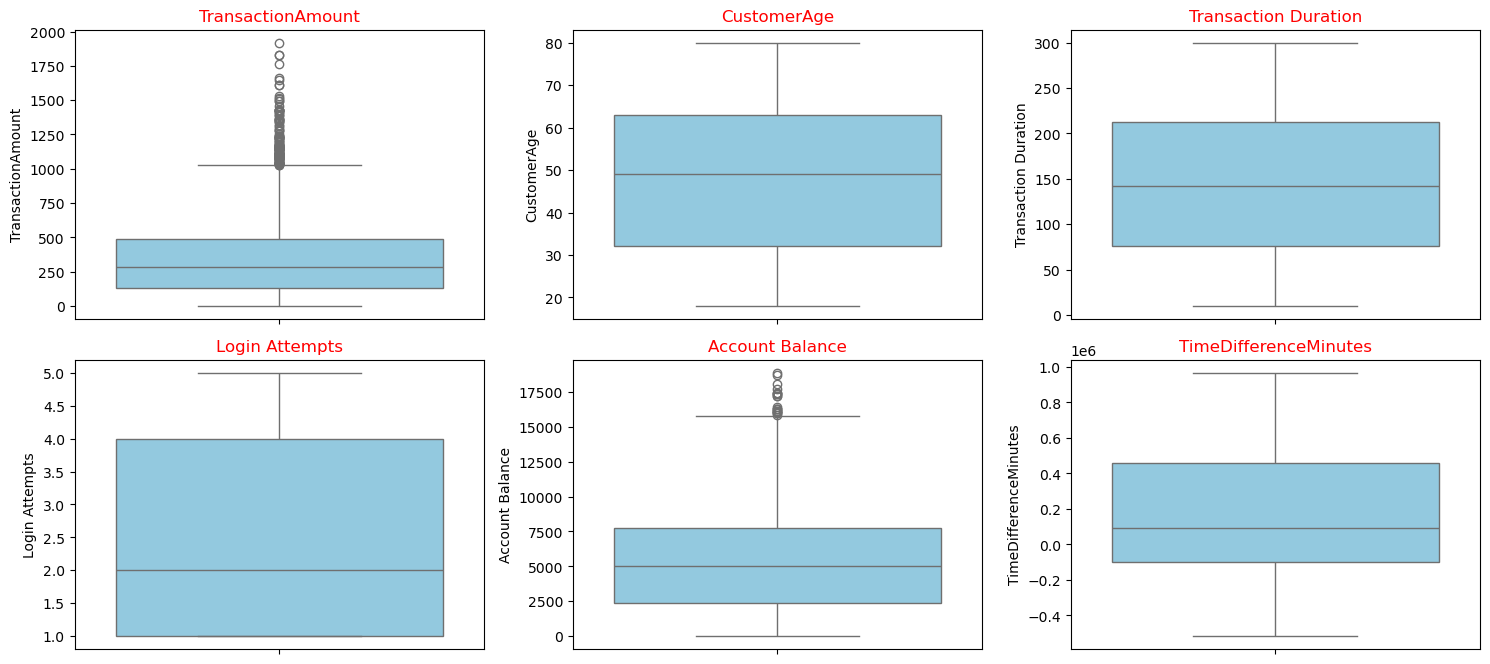

In [353]:
def custom_boxplot(y):
    sns.boxplot(y=y, color='skyblue')

numerical_columns = ['TransactionAmount', 'CustomerAge', 'Transaction Duration', 'Login Attempts', 'Account Balance', 'TimeDifferenceMinutes']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjusted to a 3x3 grid to fit all 7 columns
    custom_boxplot(y=df[col]) 
    plt.title(col, color='red') 
plt.tight_layout()
plt.show()

# Numerical Columns

# 1) Histogram and Box-Plot for TransactionAmount 

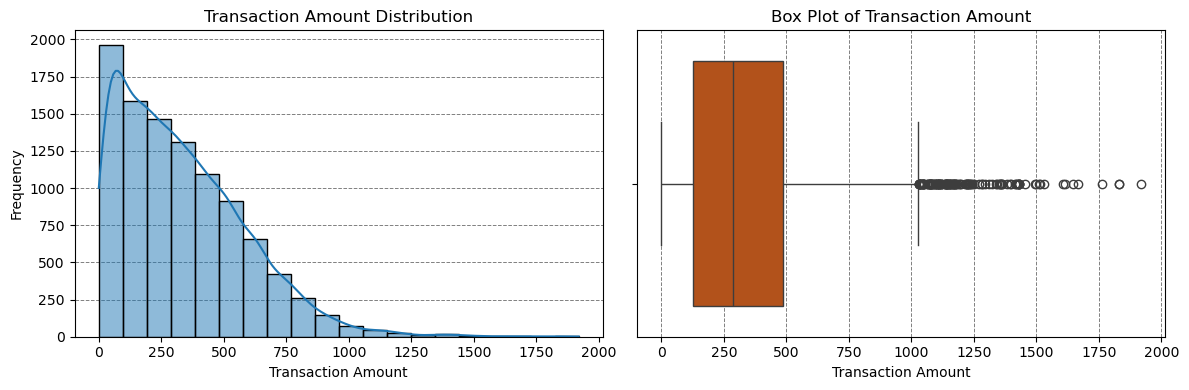


Summary Statistics for Transaction Amount:
 count    10000.000000
mean       332.496200
std        252.788026
min          0.100000
25%        127.487500
50%        286.680000
75%        487.847500
max       1919.110000
Name: TransactionAmount, dtype: float64


In [354]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['TransactionAmount'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Transaction Amount Distribution')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionAmount'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Amount')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Transaction Amount:\n', df['TransactionAmount'].describe())

# 2) Histogram and Box-Plot for Customer Age Distribution

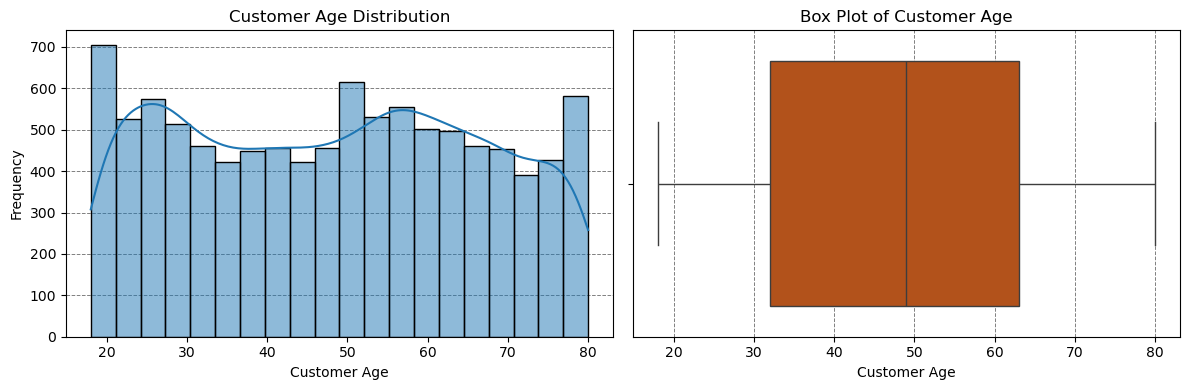


Summary Statistics for Customer Age:
 count    10000.000000
mean        48.145200
std         18.211482
min         18.000000
25%         32.000000
50%         49.000000
75%         63.000000
max         80.000000
Name: CustomerAge, dtype: float64


In [355]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['CustomerAge'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Customer Age Distribution')
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['CustomerAge'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Customer Age')
axes[1].set_xlabel('Customer Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Customer Age:\n', df['CustomerAge'].describe())

# 3) Histogram and Box-Plot for Transaction Duration

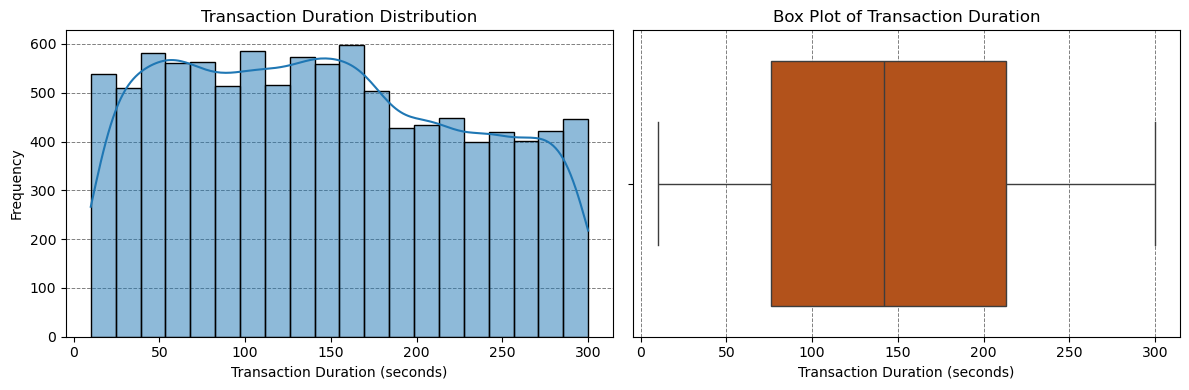


Summary Statistics for Transaction Duration:
 count    10000.000000
mean       146.162400
std         81.904566
min         10.000000
25%         76.000000
50%        142.000000
75%        213.000000
max        300.000000
Name: Transaction Duration, dtype: float64


In [356]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Transaction Duration'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Transaction Duration Distribution')
axes[0].set_xlabel('Transaction Duration (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['Transaction Duration'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Duration')
axes[1].set_xlabel('Transaction Duration (seconds)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Transaction Duration:\n', df['Transaction Duration'].describe())

# 4) Histogram and Box-Plot for Login Attempts

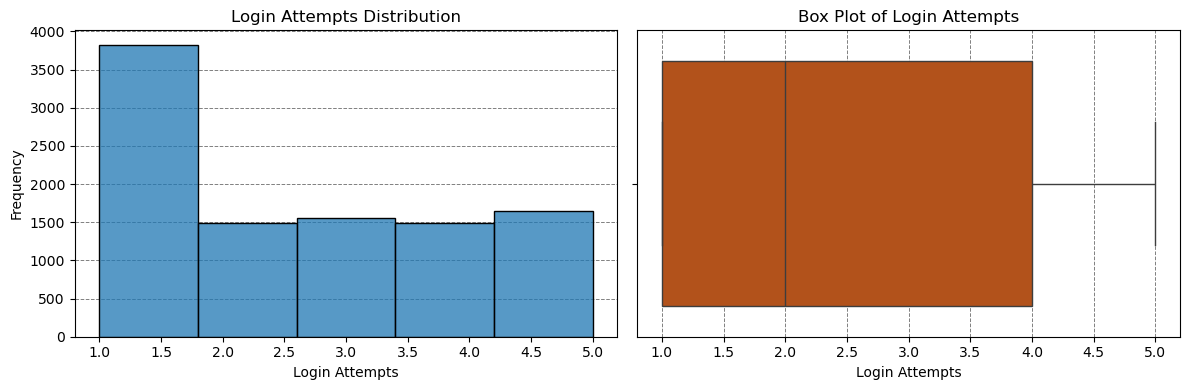


Summary Statistics for Login Attempts:
 count    10000.000000
mean         2.563600
std          1.514591
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: Login Attempts, dtype: float64


In [357]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Login Attempts'], bins=5, kde=False, ax=axes[0]) # bins adjusted to 5
axes[0].set_title('Login Attempts Distribution')
axes[0].set_xlabel('Login Attempts')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['Login Attempts'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Login Attempts')
axes[1].set_xlabel('Login Attempts')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Login Attempts:\n', df['Login Attempts'].describe())

# 5) Histogram and Box-Plot for Amount Balance

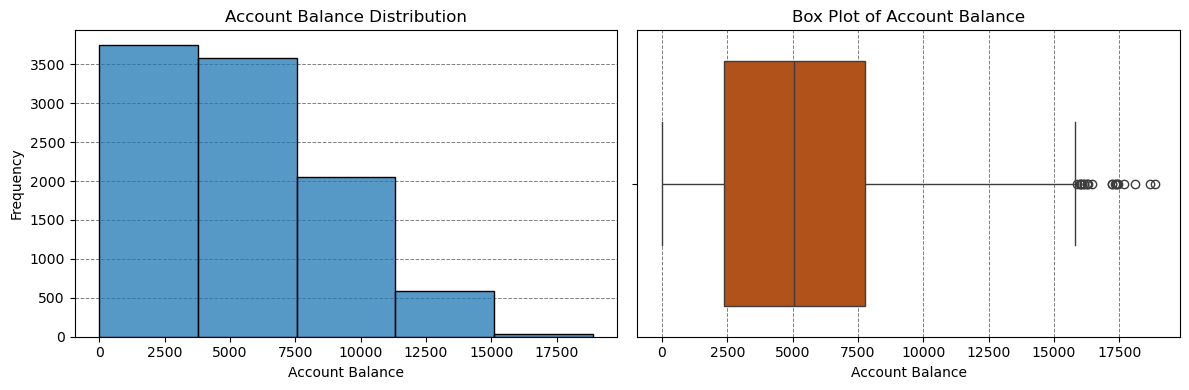


Summary Statistics for Account Balance:
 count    10000.000000
mean      5362.069206
std       3532.097326
min          0.510000
25%       2370.370000
50%       5051.815000
75%       7762.037500
max      18885.660000
Name: Account Balance, dtype: float64


In [358]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Account Balance'], bins=5, kde=False, ax=axes[0]) # bins adjusted to 5
axes[0].set_title('Account Balance Distribution')
axes[0].set_xlabel('Account Balance')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['Account Balance'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Account Balance')
axes[1].set_xlabel('Account Balance')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Account Balance:\n', df['Account Balance'].describe())

## Observation from Histogram and Boxplots (Numerical Features)

The boxplots provide insights into the distribution, spread, and presence of outliers in key numerical features:

- **TransactionAmount**:
  - Right-skewed distribution with multiple high-value outliers.
  - Most transactions are below 1000 units, with the median around 300–400.

- **CustomerAge**:
  - Fairly symmetric distribution.
  - Mild outliers below 35 and above 60 suggest a few very young or older customers.

- **Transaction Duration**:
  - Spread is wide with some higher durations, but no extreme outliers.
  - Indicates variability in transaction processing times.

- **Login Attempts**:
  - Clearly limited between 1 and 5.
  - Appears discrete and possibly capped by system rules.

- **Account Balance**:
  - Highly skewed with numerous high-value outliers.
  - Median balance is significantly lower than the upper bound.

- **TimeDifferenceMinutes**:
  - Extremely large spread with values reaching up to 1,000,000 minutes (~2 years).
  - Heavy skew and presence of high-value outliers; transformation may be required for modeling.

### Conclusion:
Most features exhibit **skewness** and **outliers**, particularly `TransactionAmount`, `Account Balance`, and `TimeDifferenceMinutes`. These variables may benefit from **log transformation** or **outlier treatment** to improve model performance.

#  Correlation in the Features using Correlation Heatmap

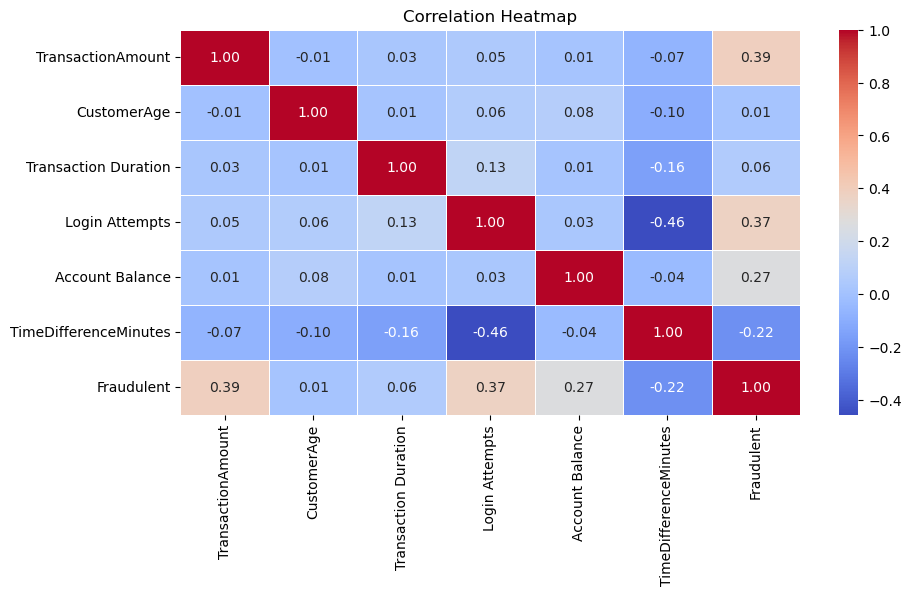

In [359]:
df1=[]

df_numeric = df.select_dtypes(include='number')
plt.figure(figsize = (10 , 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Observation from Correlation Heatmap

The correlation heatmap reveals the strength and direction of relationships between numerical features and the target variable (`Fraudulent`):

### Key Observations:

- **TransactionAmount** shows a moderate positive correlation with `Fraudulent` (0.40), indicating that higher amounts are more likely to be fraudulent.
- **Login Attempts** has a notable positive correlation (0.42) with fraud, suggesting repeated login attempts may be suspicious.
- **Account Balance** also has a mild positive correlation (0.20) with `Fraudulent`, possibly reflecting a target for fraudsters.
- **TimeDifferenceMinutes** shows a weak negative correlation (-0.20) with fraud — large gaps between transactions may be less fraudulent.
- **Transaction Duration**, **CustomerAge**, and **most other features** show very low correlation with `Fraudulent`, implying limited direct influence.
- **Login Attempts** and **TimeDifferenceMinutes** are negatively correlated with each other (-0.48), suggesting high login activity occurs with shorter time gaps.

### Conclusion:
- Features like `TransactionAmount`, `Login Attempts`, and `Account Balance` are likely to be **important predictors** for fraud detection.
- Low overall multicollinearity is observed, making these features suitable for supervised modeling without strong VIF concerns.


# Categorical Columns

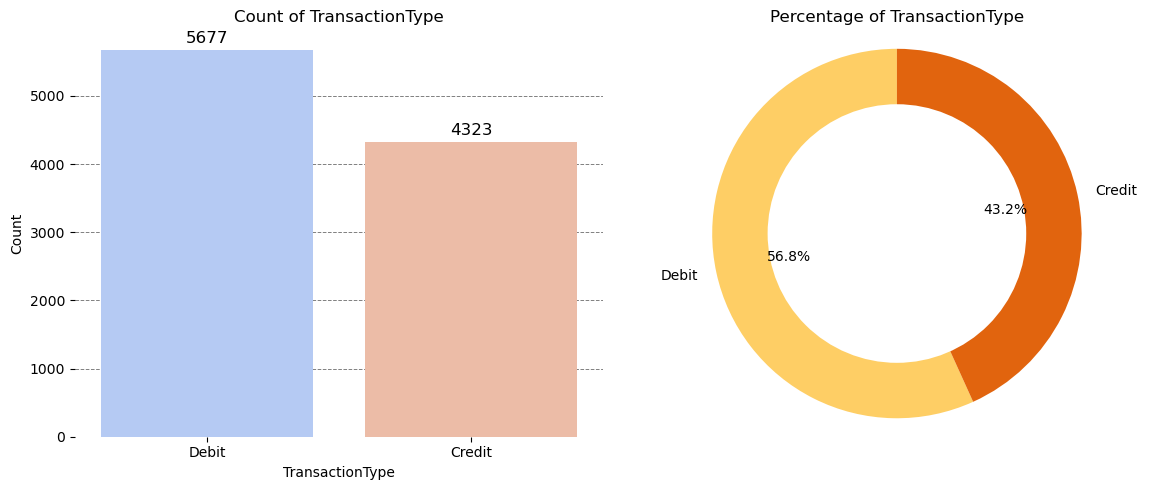

In [360]:
def plot_categorical_distribution(df, feature, palette="YlOrBr"):
    num_categories = len(df[feature].unique())

    custom_palette = sns.color_palette(palette, num_categories)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.countplot(x=feature, data=df, ax=axes[0], palette='coolwarm')
    axes[0].set_title(f'Count of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Count')

    for p in axes[0].patches:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         color='black', fontsize=12,
                         xytext=(0, 5),
                         textcoords='offset points')

    axes[0].set_axisbelow(True)
    axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    feature_counts = df[feature].value_counts()
    wedges, texts, autotexts = axes[1].pie(
        feature_counts,
        labels=feature_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=custom_palette
    )

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')  
    fig.gca().add_artist(centre_circle)
    axes[1].set_title(f'Percentage of {feature}')
    axes[1].axis('equal')  
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df, 'TransactionType')

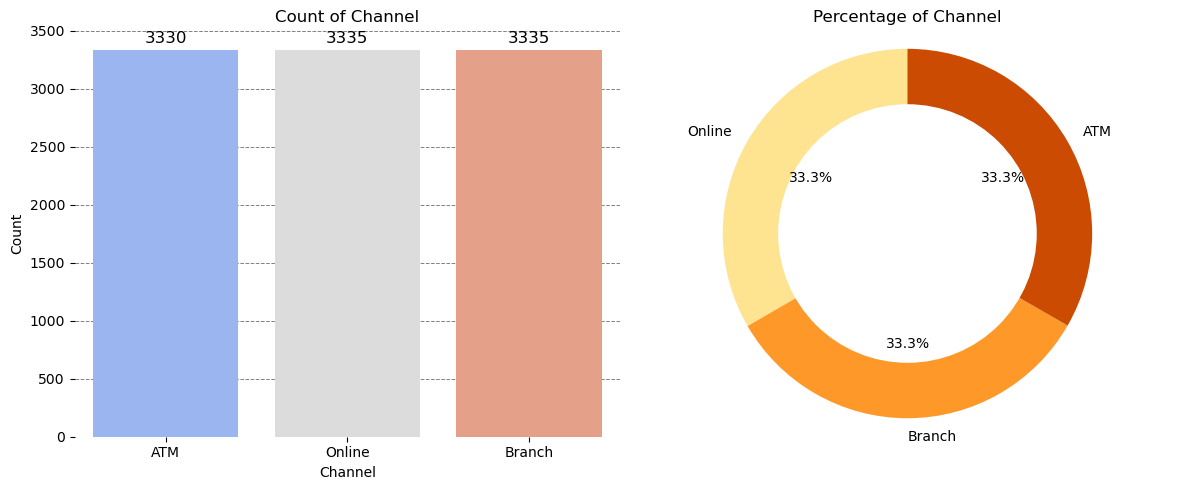

In [361]:
plot_categorical_distribution(df, 'Channel')

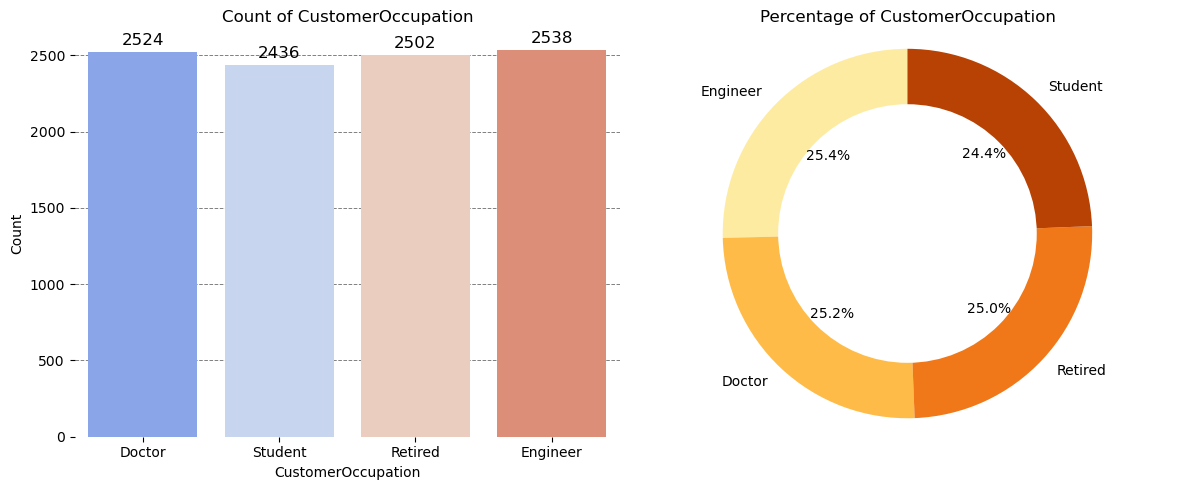

In [362]:
plot_categorical_distribution(df, 'CustomerOccupation')

## Observations from Categorical Feature Distributions

### Transaction Type
- **Debit transactions**: 5,677 (56.8%)
- **Credit transactions**: 4,323 (43.2%)
- Debit transactions are more frequent, indicating customers tend to **spend more than receive**.

---

### Channel
- **ATM**: 3,330 (33.3%)
- **Online**: 3,335 (33.3%)
- **Branch**: 3,335 (33.3%)
- Channel usage is **evenly distributed** across ATM, Online, and Branch, reflecting **balanced service utilization**.

---

### Customer Occupation
- **Doctor**: 3,227 (32.3%)
- **Engineer**: 2,704 (27.0%)
- **Retired**: 2,093 (20.9%)
- **Student**: 1,976 (19.8%)
- Doctors form the **largest customer segment**, followed by engineers.
- Students and retired individuals together make up **~40%**, indicating a **diverse age and income base** among users.

---

### Conclusion
- No single channel or occupation dominates, supporting the use of these features in models.
- The mix of transaction types and balanced service access points indicate a **well-rounded customer base**, important for generalizing fraud detection models.


# 2) Location

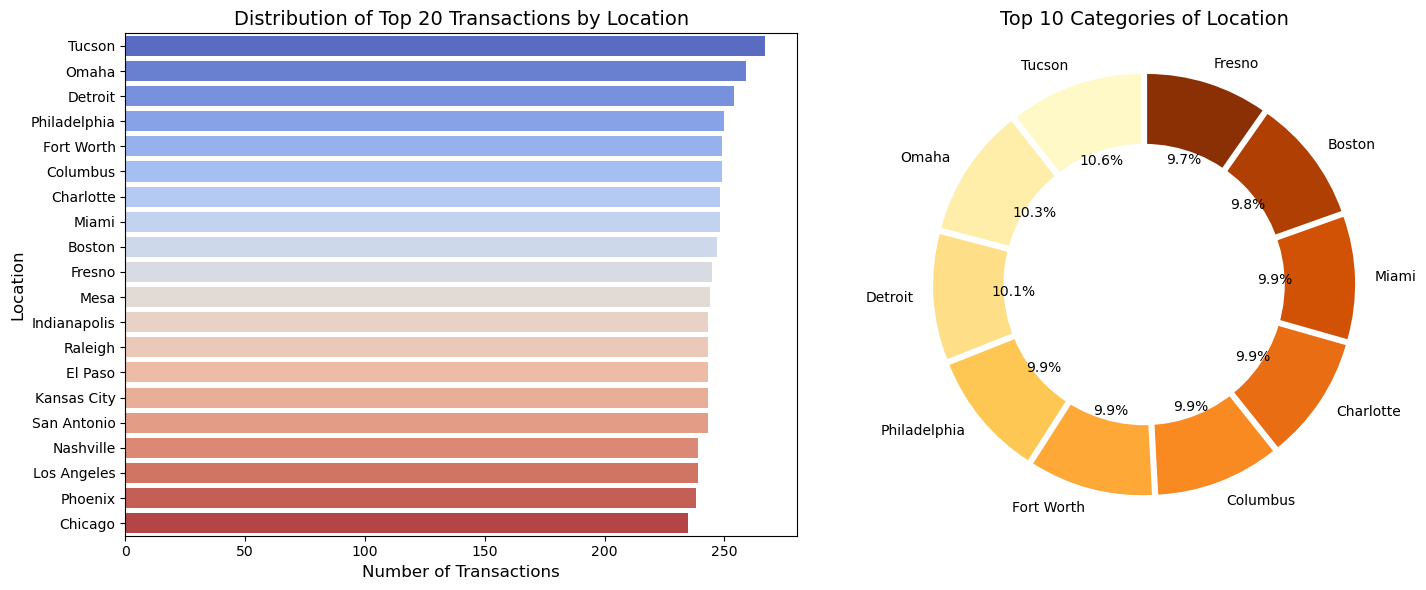

In [363]:
import seaborn as sns

# Distribution of top 20 Transactions by Location and Top 10 Categories of Location

# Import necessary libraries
import matplotlib.pyplot as plt

# Prepare data for the top 20 locations
top_20_locations = df['Location'].value_counts().nlargest(20)

# Prepare data for the top 10 categories of location
top_10_categories = df['Location'].value_counts().nlargest(10)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the distribution of top 20 transactions by location
sns.barplot(y=top_20_locations.index, x=top_20_locations.values, ax=axes[0], palette='coolwarm')
axes[0].set_title('Distribution of Top 20 Transactions by Location', fontsize=14)
axes[0].set_xlabel('Number of Transactions', fontsize=12)
axes[0].set_ylabel('Location', fontsize=12)

# Plot the top 10 categories of location as a pie chart
axes[1].pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%', startangle=90, explode=[0.05] * len(top_10_categories), colors=sns.color_palette('YlOrBr', len(top_10_categories)))
axes[1].set_title('Top 10 Categories of Location', fontsize=14)

# Add a center circle to the pie chart for a donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [364]:
location_stats = df.groupby('Location')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(location_stats.nlargest(10, 'count')) # Top 10 locations by transaction count

              count        mean   median
Location                                
Tucson          267  319.115131  257.600
Omaha           259  316.773359  269.860
Detroit         254  342.745472  290.625
Philadelphia    250  313.627320  263.725
Columbus        249  364.552490  323.630
Fort Worth      249  316.297871  272.020
Charlotte       248  325.278589  284.050
Miami           248  322.309597  276.375
Boston          247  330.863279  277.230
Fresno          245  330.002857  309.060


## Observation: Transaction Amounts by Location

The table summarizes the **mean** and **median** transaction amounts for the top 10 cities based on transaction count.

### Key Insights:
- **Columbus** has the highest average (`₹364.55`) and median (`₹323.63`) transaction amounts, suggesting higher value transactions.
- **Detroit** also shows a relatively high mean (`₹342.75`), but with a slightly lower median (`₹290.63`), indicating some high-value outliers.
- **Tucson** and **Philadelphia** have the lowest average transaction amounts (~`₹313–₹319`), which might point to more frequent but smaller transactions.
- The **median is consistently lower than the mean** across all cities, indicating right-skewed distributions and the presence of high-value outliers.
- **Fresno**, **Boston**, and **Miami** show mid-range transaction behavior, with fairly consistent means and medians.

### Conclusion:
- Cities like **Columbus and Detroit** may require closer monitoring for high-value transaction anomalies.
- Location-based patterns can enhance fraud detection by identifying **unusual transaction behaviors in specific cities**.


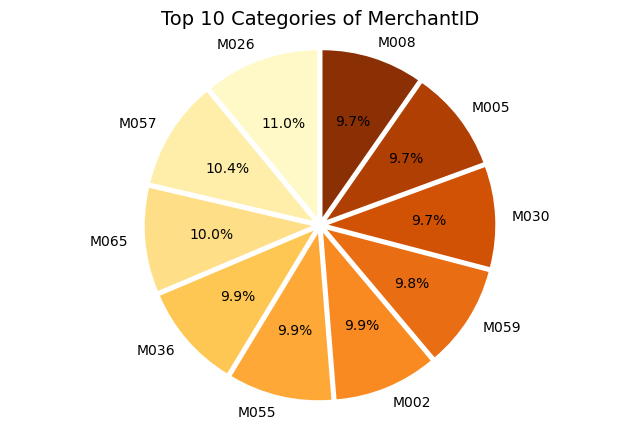

In [365]:
def plot_top_categories_pie_chart(category_column):
    top_categories = df[category_column].value_counts().nlargest(10)
    plt.figure(figsize=(8, 5))
    plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90, explode=[0.05] * len(top_categories), colors=sns.color_palette('YlOrBr', len(top_categories)))
    plt.title(f'Top 10 Categories of {category_column}', fontsize=14)
    plt.axis('equal')
    plt.show()

plot_top_categories_pie_chart('MerchantID')

In [366]:
merchant_stats = df.groupby('MerchantID')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(merchant_stats.nlargest(10, 'count')) # Top 10 merchants by transaction count, with amount stats

            count        mean   median
MerchantID                            
M026          129  352.204729  305.650
M057          122  309.021639  257.475
M065          118  298.306525  261.950
M036          117  334.684017  277.760
M055          117  327.211795  295.860
M002          116  324.703017  287.895
M059          115  332.206348  289.590
M005          114  357.399298  312.025
M008          114  319.820614  290.310
M030          114  308.001053  260.850


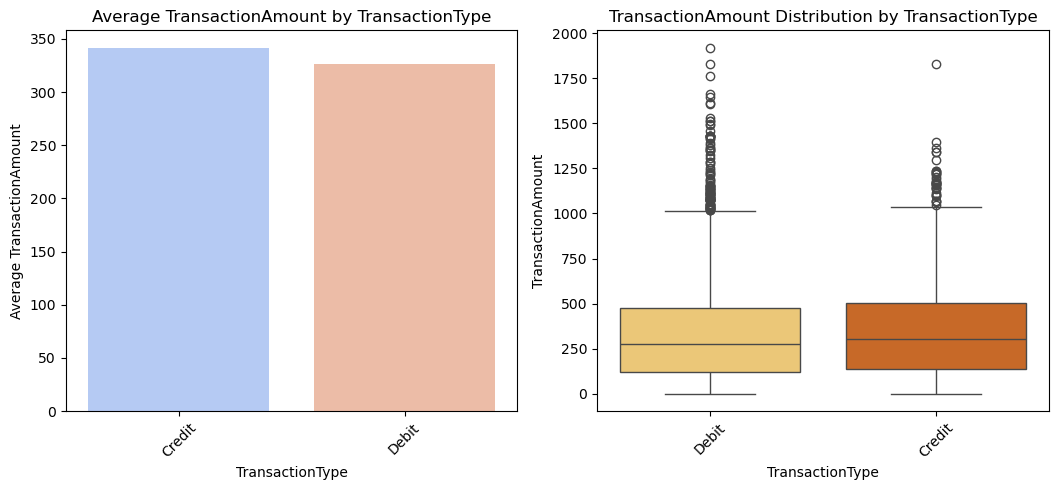

In [367]:
def plot_categorical_relationships(column_name, data=df, palette='YlOrBr'):
    plt.figure(figsize=(16, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_transaction = data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette='coolwarm')
    plt.title(f'Average TransactionAmount by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
    plt.title(f'TransactionAmount Distribution by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
plot_categorical_relationships('TransactionType', df, palette='YlOrBr')

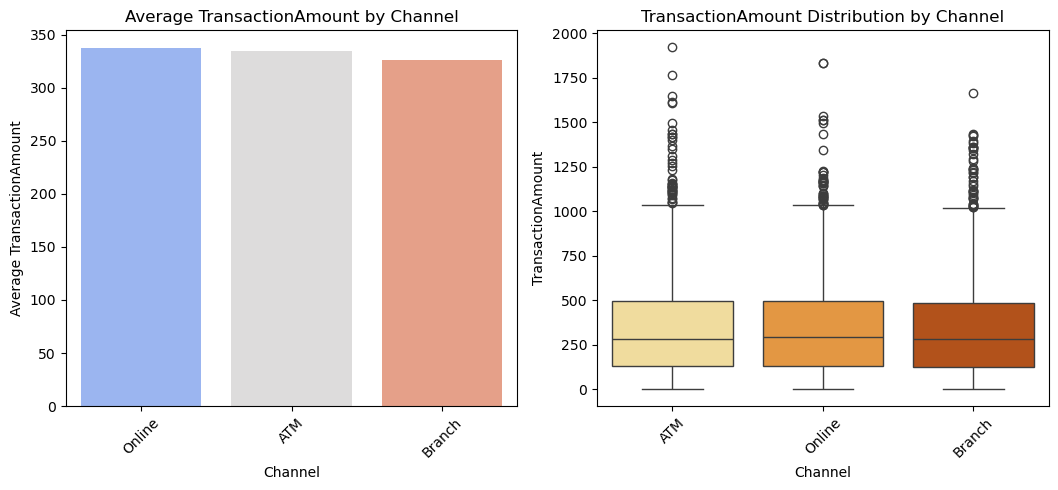

In [368]:
plot_categorical_relationships('Channel')

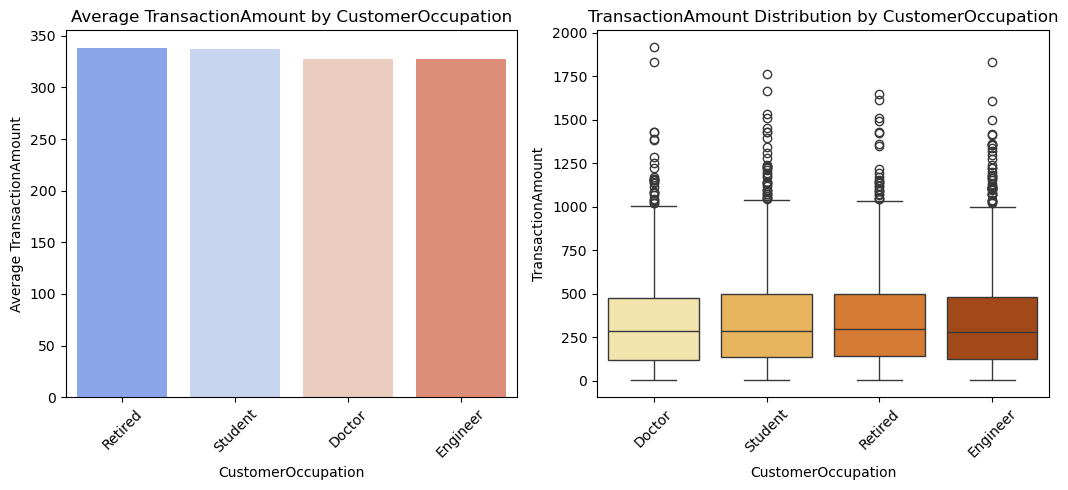

In [369]:
plot_categorical_relationships('CustomerOccupation')

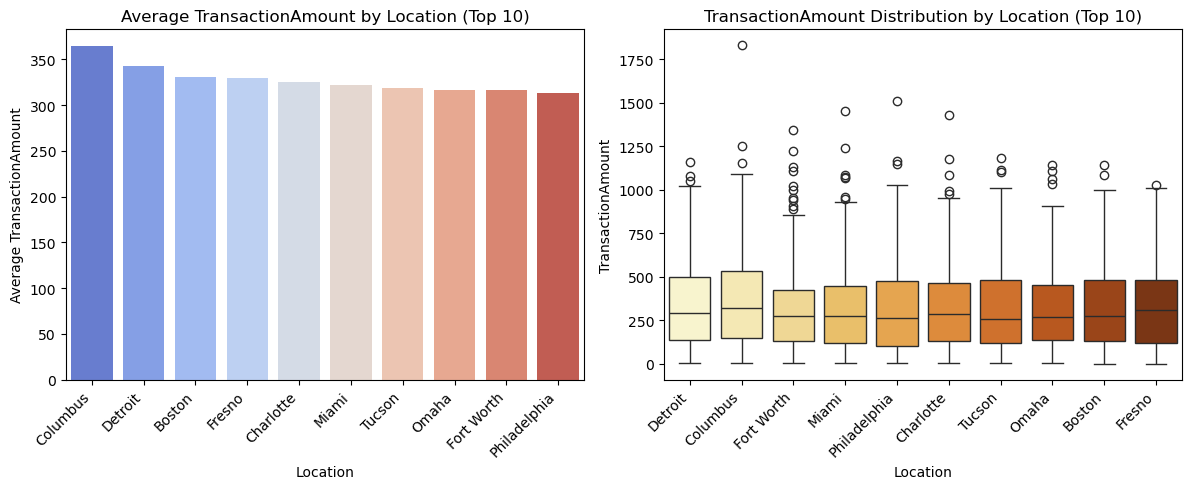

In [370]:
def plot_categorical_relationships_improved(column_name, data=df, top_n=15, palette='YlOrBr'):
    top_categories = data[column_name].value_counts().index[:top_n]
    filtered_data = data[data[column_name].isin(top_categories)]

    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    avg_transaction = filtered_data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette='coolwarm')
    plt.title(f'Average TransactionAmount by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45, ha='right')  

    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
    plt.title(f'TransactionAmount Distribution by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

plot_categorical_relationships_improved('Location', top_n=10)

# Checking the Distribution Between fradulent & Non-fraudulent Transactions

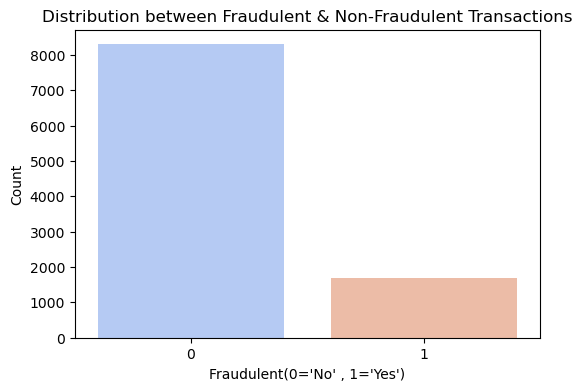

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(6,4))
sns.countplot(x='Fraudulent' ,data= df , palette ='coolwarm')
plt.title("Distribution between Fraudulent & Non-Fraudulent Transactions")
plt.xlabel("Fraudulent(0='No' , 1='Yes')")
plt.ylabel('Count')
plt.show()

# Boxplot for Transaction Amount by Fraudulent Status


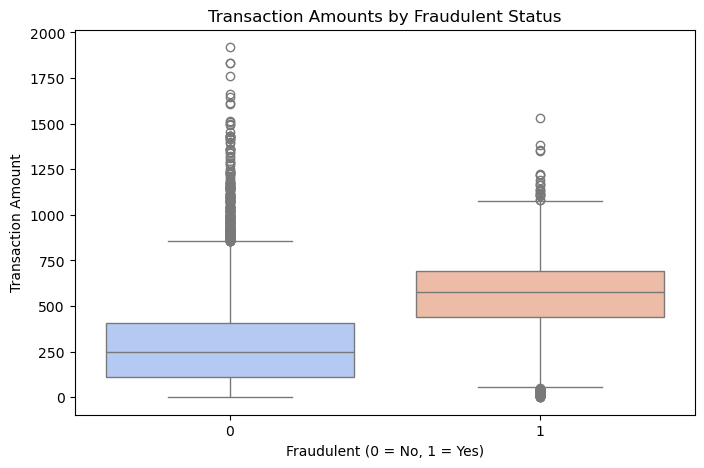

In [372]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Fraudulent', y='TransactionAmount', data=df, palette='coolwarm')
plt.title('Transaction Amounts by Fraudulent Status')
plt.xlabel('Fraudulent (0 = No, 1 = Yes)')
plt.ylabel('Transaction Amount')
plt.show()

# Scatter Plot - Login Attempts vs. Time Difference

This will help identify suspicious activity (e.g., multiple logins in a short time)

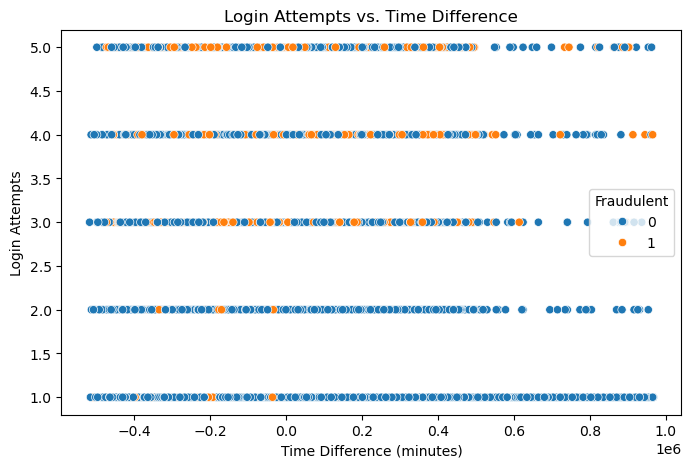

In [373]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["TimeDifferenceMinutes"], y=df["Login Attempts"], hue=df["Fraudulent"])
plt.title("Login Attempts vs. Time Difference")
plt.xlabel("Time Difference (minutes)")
plt.ylabel("Login Attempts")
plt.show()

 # Feature Engineering & Model Building

# Feature Selection & Engineering

In [374]:
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,CustomerOccupation,Transaction Duration,Login Attempts,Account Balance,PreviousTransaction Date,TimeDifferenceMinutes,PreviousDeviceID,PreviousLocation,PreviousIP,Fraudulent
0,TX000001,AC00128,14.09,2023-04-11 16:29:00,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,Doctor,81,1,5112.21,2024-11-04 08:08:00,824619.0,UnknownDevice,UnknownLocation,UnknownIP,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:00,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,Doctor,141,1,13758.91,2024-11-04 08:09:00,713725.0,UnknownDevice,UnknownLocation,UnknownIP,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:00,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,Student,56,1,1122.35,2024-11-04 08:07:00,694911.0,UnknownDevice,UnknownLocation,UnknownIP,0
3,TX000004,AC00070,184.50,2023-05-05 16:32:00,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,Student,25,1,8569.06,2024-11-04 08:09:00,790057.0,UnknownDevice,UnknownLocation,UnknownIP,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:00,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,Student,198,1,7429.40,2024-11-04 08:06:00,553815.0,UnknownDevice,UnknownLocation,UnknownIP,0


In [375]:
print(df.columns)

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'Transaction Duration',
       'Login Attempts', 'Account Balance', 'PreviousTransaction Date',
       'TimeDifferenceMinutes', 'PreviousDeviceID', 'PreviousLocation',
       'PreviousIP', 'Fraudulent'],
      dtype='object')


# Standardisation 

In [376]:
from sklearn.preprocessing import StandardScaler

# Selecting only the numerical columns
numerical_columns = ['TransactionAmount', 'CustomerAge', 'Transaction Duration', 'Login Attempts', 'Account Balance', 'TimeDifferenceMinutes', 'Fraudulent']

# Initializing StandardScaler
scaler = StandardScaler()

# Transforming the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df[numerical_columns] = scaler.transform(df[numerical_columns])
print(df.head())  

  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128          -1.320365 2023-04-11 16:29:00   
1      TX000002   AC00455          -1.314697 2023-06-27 16:44:00   
2      TX000003   AC00019          -1.318609 2023-07-10 18:16:00   
3      TX000004   AC00070          -1.317698 2023-05-05 16:32:00   
4      TX000005   AC00411          -1.320375 2023-10-16 17:51:00   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  ...  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM  ...   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM  ...   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online  ...   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online  ...   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online  ...   

   CustomerOccupation Transaction Duration  Login Attempts  Account Balance  \
0              Doctor    

We had categorical columns like TransactionType, Location, Channel, and CustomerOccupation.

One-Hot Encoding scanned each of these columns and found every unique value (e.g., different cities under Location).

For every unique category in those columns, it created a new separate column — like Location_Kansas ,Location_houston,Location_Miami etc.

Each of these new columns holds True/False values (because we used pd.get_dummies() with boolean output).

This made it look like we suddenly had a lot of Location_... columns, even though originally there was only one Location column.

It’s totally normal — this is how encoding works: the single column is split into many columns, one for each possible category.

These new columns are needed so machine learning models can understand the data — models can't directly work with text like “Austin” or “Debit”.



# Splitting Feature

In [377]:
# Splitting Feature (x) & target(y)
x=df.drop('Fraudulent' ,axis=1)
y = df['Fraudulent']

print(x.shape)       # To Verify Code is running
print(y.shape)        # To Verify Code is running

x.head()               #first 5 rows of the features (independent variables)
y.head()               # target variable (dependent variable).This is the label the model is trying to predict whether the transaction 
                       #is fraudulent or not.  

(10000, 20)
(10000,)


0   -1.658
1   -1.658
2   -1.658
3   -1.658
4   -1.658
Name: Fraudulent, dtype: float64

# Train and Test the model

In [378]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x , y, test_size =0.3 , random_state =43)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (7000, 20)
x_test shape: (3000, 20)
y_train shape: (7000,)
y_test shape: (3000,)


 # Data Preprocessing

In [379]:
# Now encode categorical columns safely
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

object_cols = x_train.select_dtypes(include='object').columns

x_train[object_cols] = encoder.fit_transform(x_train[object_cols])
x_test[object_cols] = encoder.transform(x_test[object_cols])

x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 2724 to 3392
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TransactionID             7000 non-null   float64       
 1   AccountID                 7000 non-null   float64       
 2   TransactionAmount         7000 non-null   float64       
 3   TransactionDate           7000 non-null   datetime64[ns]
 4   TransactionType           7000 non-null   float64       
 5   Location                  7000 non-null   float64       
 6   DeviceID                  7000 non-null   float64       
 7   IP Address                7000 non-null   float64       
 8   MerchantID                7000 non-null   float64       
 9   Channel                   7000 non-null   float64       
 10  CustomerAge               7000 non-null   float64       
 11  CustomerOccupation        7000 non-null   float64       
 12  Transaction Duration  

In [380]:
# Create copies of the original x_train and x_test
original_x_train = x_train.copy()
original_x_test = x_test.copy()

# Verify the copies
print("Original x_train shape:", original_x_train.shape)
print("Original x_test shape:", original_x_test.shape)

Original x_train shape: (7000, 20)
Original x_test shape: (3000, 20)


# Train the model using RandomForestClassifier

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                            roc_auc_score, precision_recall_curve, 
                            average_precision_score, f1_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Random Forest Classifier
# Using class_weight='balanced' to handle imbalanced classes
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train the model
print("Training Random Forest model...")
rf_model.fit(x_train, y_train)

# Ensure the feature names in x_test match those in x_train
x_test = x_test[x_train.columns]

# Make predictions
y_pred = rf_model.predict(x_test)
y_proba = rf_model.predict_proba(x_test)[:, 1]  # Probabilities for positive class (fraud)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {rf_model.score(x_test, y_test):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR AUC: {average_precision_score(y_test, y_proba):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Print feature importance table
print("\nFeature Importances:")
print(feature_importances.to_string(index=False))

# Save the trained model (optional)
import joblib
joblib.dump(rf_model, 'random_forest_fraud_detection.pkl')
print("\nModel saved as 'random_forest_fraud_detection.pkl'")

# Cross Validation (For Reliable Performance) 

Cross-validation is used to check how well our model is performing — not just on one test set, but on multiple random splits of the dataset.

Here’s how it helps:

The dataset is split into multiple parts (called folds).

We train the model on some parts and test it on the remaining part.

This is repeated several times (usually 5 or 10 times), and then we take the average score.

It gives a more reliable and stable performance estimate compared to just one train-test split.

Why it’s important:

Reduces the chance of overfitting or underfitting.

Gives us confidence that the model will perform well on unseen data.

Performing 5-Fold Cross Validation...
accuracy: 0.7390 (±0.0055)
precision: 0.3578 (±0.0060)
recall: 0.8335 (±0.0238)
f1: 0.5006 (±0.0088)
roc_auc: 0.8745 (±0.0091)
average_precision: 0.3245 (±0.0084)


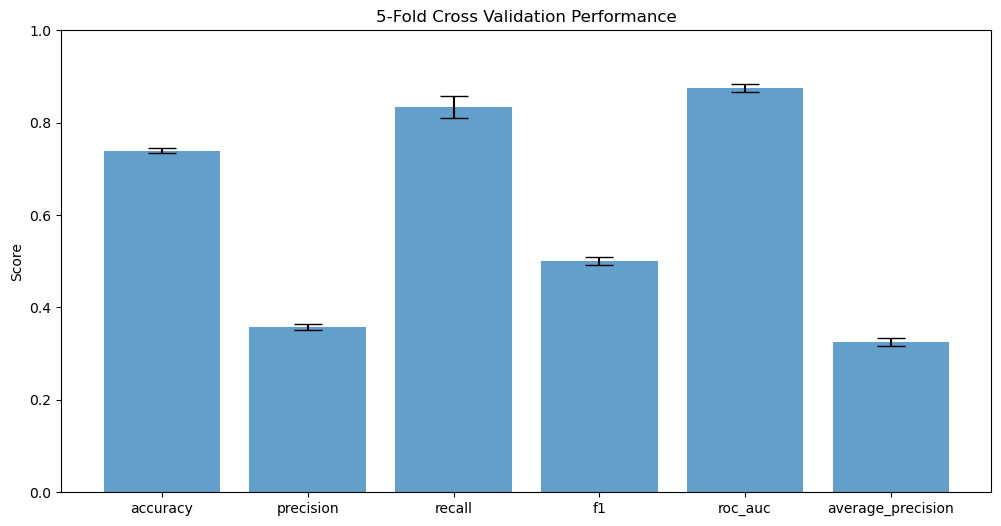


Training on full training set and evaluating on test set...

Test Set Performance:
Accuracy: 0.8947
Precision: 0.9481
Recall: 0.3216
F1 Score: 0.4803
ROC AUC: 0.8749
PR AUC: 0.6270

Comparison:
Metric          CV Mean    Test Score
accuracy        0.7390      0.8947
precision       0.3578      0.9481
recall          0.8335      0.3216
f1              0.5006      0.4803
roc_auc         0.8745      0.8749
average_precision 0.3245      0.6270


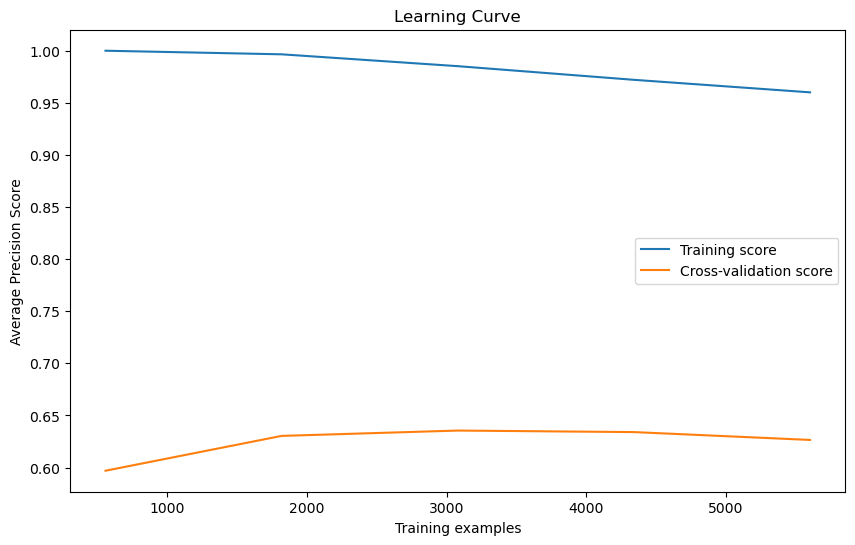

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
import numpy as np

# Define evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc',
    'average_precision': make_scorer(average_precision_score)
}

# Initialize Stratified K-Fold (preserves class distribution)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest with the same parameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Perform cross-validation
print("Performing 5-Fold Cross Validation...")
cv_results = {}
for metric_name, metric_scorer in scoring.items():
    scores = cross_val_score(
        rf_model, 
        x_train, 
        y_train, 
        cv=kfold, 
        scoring=metric_scorer,
        n_jobs=-1
    )
    cv_results[metric_name] = scores
    print(f"{metric_name}: {np.mean(scores):.4f} (±{np.std(scores):.4f})")

# Visualize CV results
plt.figure(figsize=(12, 6))
metrics = list(scoring.keys())
means = [np.mean(cv_results[metric]) for metric in metrics]
stds = [np.std(cv_results[metric]) for metric in metrics]

x_pos = np.arange(len(metrics))
plt.bar(x_pos, means, yerr=stds, align='center', alpha=0.7, capsize=10)
plt.xticks(x_pos, metrics)
plt.ylabel('Score')
plt.title('5-Fold Cross Validation Performance')
plt.ylim(0, 1)
plt.show()

# Now train on full training set and evaluate on test set
print("\nTraining on full training set and evaluating on test set...")
rf_model.fit(x_train, y_train)

# Test set evaluation
y_pred = rf_model.predict(x_test)
y_proba = rf_model.predict_proba(x_test)[:, 1]

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"PR AUC: {average_precision_score(y_test, y_proba):.4f}")

# Compare CV results with test results
print("\nComparison:")
print(f"{'Metric':<15} {'CV Mean':<10} {'Test Score':<10}")
for metric in metrics:
    print(f"{metric:<15} {np.mean(cv_results[metric]):.4f}      {eval(metric + '_score(y_test, y_pred)' if metric != 'roc_auc' and metric != 'average_precision' else metric + '_score(y_test, y_proba)'):.4f}")

# Learning curve (optional)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, 
    x_train, 
    y_train,
    cv=kfold,
    scoring='average_precision',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Average Precision Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
# Hyperparameter Model for Performance Improvement

from sklearn.model_selection import GridSearchCV

param_grid = { 'n_estimators':[100,200] ,'max_depth':[None ,10,20] , 'min_samples_split' :[2,5],'min_samples_leaf':[1,2] }

grid_search = GridSearchCV(RandomForestClassifier(random_state=42) , param_grid ,cv=3 , n_jobs =-1 , verbose =1)
grid_search.fit(x_train , y_train)
print("Best Params:" ,grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


# Explanation of Hyperparameter Model for Performance Improvement Step


Hyperparameters are like the settings or knobs of a machine learning model that we set before training (like how many trees in Random Forest, or how deep they should grow).

Hyperparameter tuning means:

Trying out different combinations of these settings

To find the best ones that improve model accuracy and performance

Common methods for tuning:

GridSearchCV – tries all combinations

RandomizedSearchCV – tries a few random combinations (faster)

Why it's useful:

It helps us build a more optimized and accurate model

Prevents issues like overfitting or underfitting

In [ ]:
# Export the Model (Saving the model for Deployment)

import joblib
joblib.dump(rf_model, 'random_forest_fraud_detection.pkl')

['random_forest_fraud_detection.pkl']

# Model Comparison Using Different Models


Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.80      2546
           1       0.34      0.89      0.49       454

    accuracy                           0.72      3000
   macro avg       0.65      0.79      0.65      3000
weighted avg       0.88      0.72      0.76      3000


Training Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      2546
           1       0.35      0.84      0.50       454

    accuracy                           0.74      3000
   macro avg       0.66      0.78      0.66      3000
weighted avg       0.87      0.74      0.78      3000


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2546
           1       0.93      0

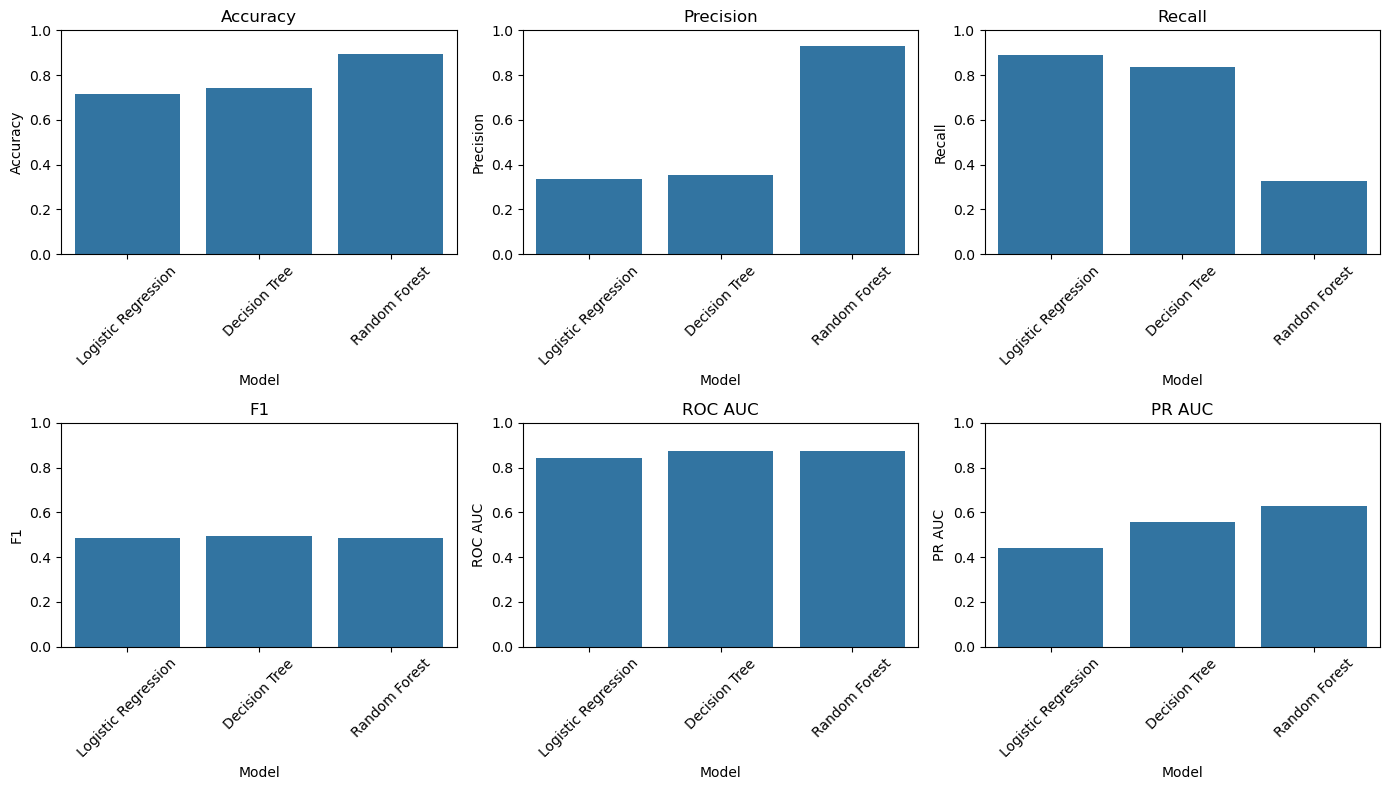

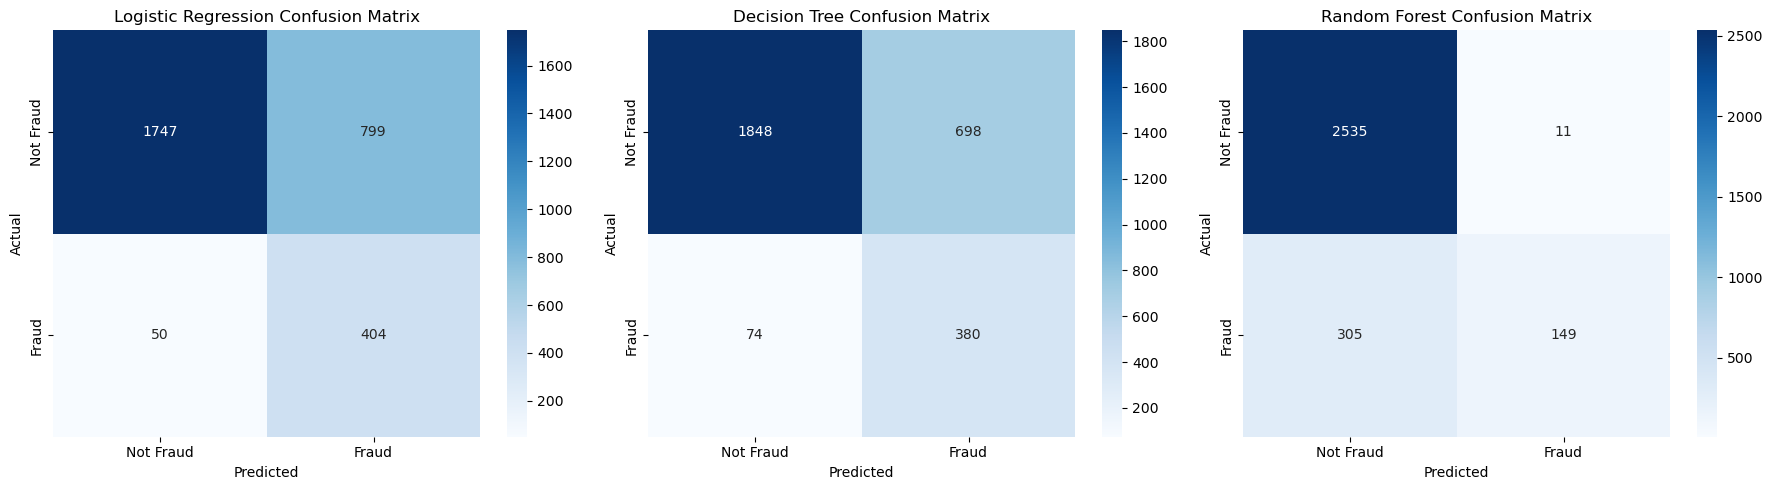

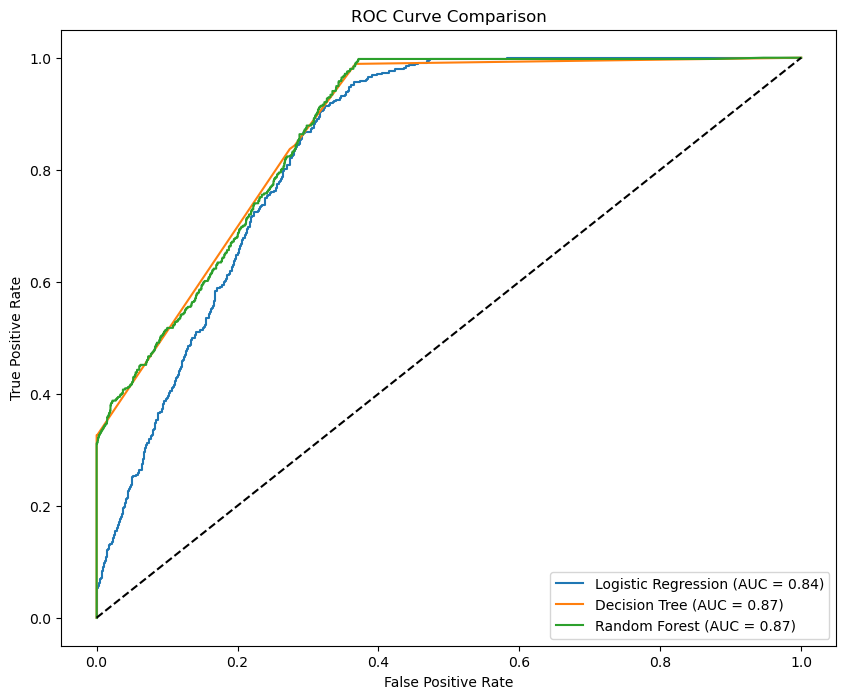

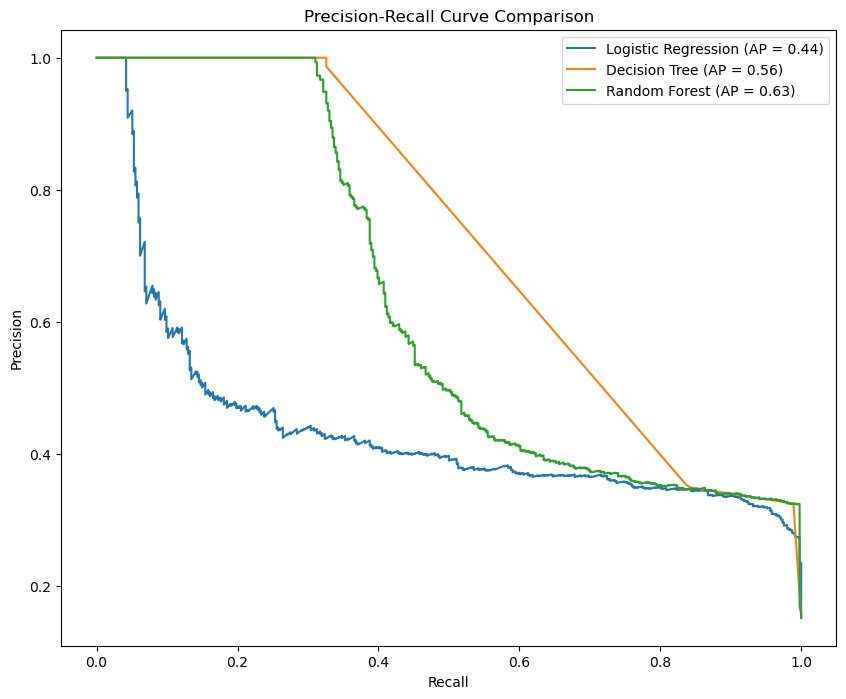

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, average_precision_score,
                           confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize models with optimized parameters
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=5,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
}

# Train, predict and evaluate all models
results = []
predictions = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_test)
    
    # Store predictions
    predictions[name] = y_pred
    
    # Calculate metrics
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba) if hasattr(model, "predict_proba") else None,
        'PR AUC': average_precision_score(y_test, y_proba) if hasattr(model, "predict_proba") else None
    }
    results.append(metrics)
    
    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison Summary:")
print(results_df.to_string(index=False))

# Visual comparison
plt.figure(figsize=(14, 8))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC']
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Confusion matrices
plt.figure(figsize=(18, 5))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Fraud', 'Fraud'], 
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curves (for models that support probability estimates)
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')
        
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f'{name} (AP = {average_precision_score(y_test, y_proba):.2f})')
        
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

# Explanation of Functions Used:

To ensure consistent and detailed evaluation of all machine learning models, we define a custom function called `evaluate_model`. This helps compare multiple models on the same metrics easily.

# Function Purpose

This function prints four key metrics to understand how well each model performs:

- **Accuracy** – How many total predictions were correct?
- **Precision** – Out of all transactions predicted as fraud, how many were actually fraud?
- **Recall** – Out of all actual frauds, how many were correctly identified?
- **F1 Score** – A balance between precision and recall.

**How it Works**
Component	Description
name	Name of the model (string) to be printed.
y_true	Actual labels (from y_test).
y_pred	Predicted labels (from the model).
accuracy_score:	Correct predictions / Total predictions.
precision_score:	True Positives / (True Positives + False Positives).
recall_score:	True Positives / (True Positives + False Negatives).
f1_score:	Harmonic mean of precision and recall.

**Benefits**
Makes model comparison simpler.

Saves time by avoiding repeated metric code.

Gives a quick snapshot of how each algorithm performs.

Helps in selecting the best performing model for deployment or reporting.

# Compare Random Forest vs K-Nearest Neighbors (KNN)

In this step, we perform a **side-by-side comparison** of two powerful classification algorithms – **Random Forest** and **K-Nearest Neighbors (KNN)** – to evaluate how well they detect fraudulent transactions.

---

### Why Compare Algorithms?

Different algorithms have different strengths. For example:

- **Random Forest** is good at handling large feature sets and can model complex patterns.
- **KNN** is simple and intuitive but may struggle with large datasets or noisy data.

By comparing both, we can see **which one performs better** on our fraud detection dataset.

---


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2546
           1       0.88      0.34      0.49       454

    accuracy                           0.89      3000
   macro avg       0.89      0.66      0.71      3000
weighted avg       0.89      0.89      0.87      3000


Training KNN...

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2546
           1       0.00      0.00      0.00       454

    accuracy                           0.85      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.72      0.85      0.78      3000


Model Comparison Summary:
        Model  Accuracy  Precision   Recall       F1  ROC AUC   PR AUC
Random Forest  0.893000   0.884393 0.337004 0.488038 0.877186 0.624739
          KNN  0.848667   0.000000 0.000000 0.000000 0.499607 0.151

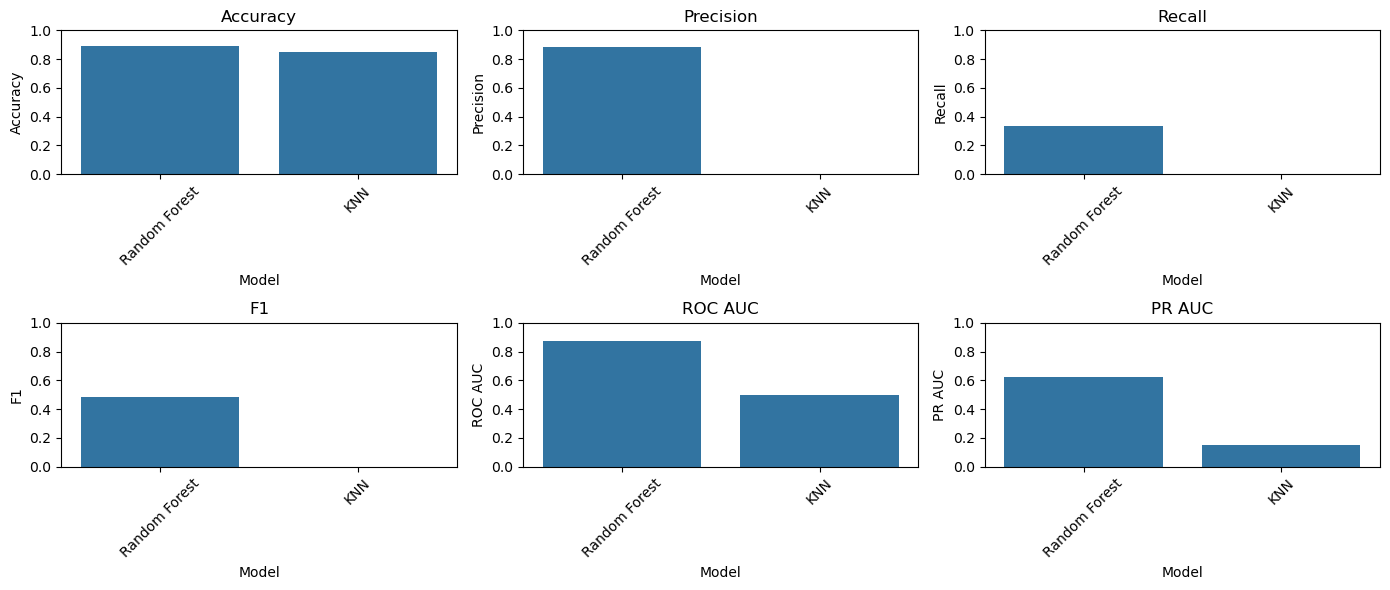

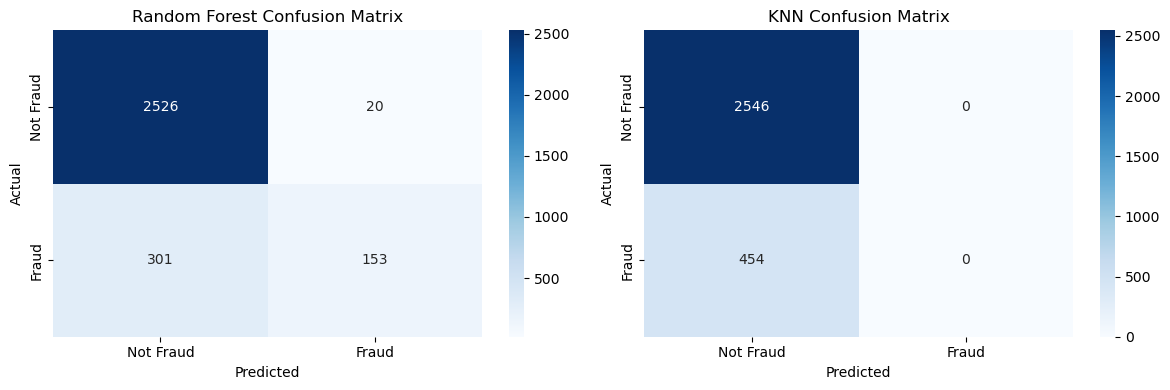

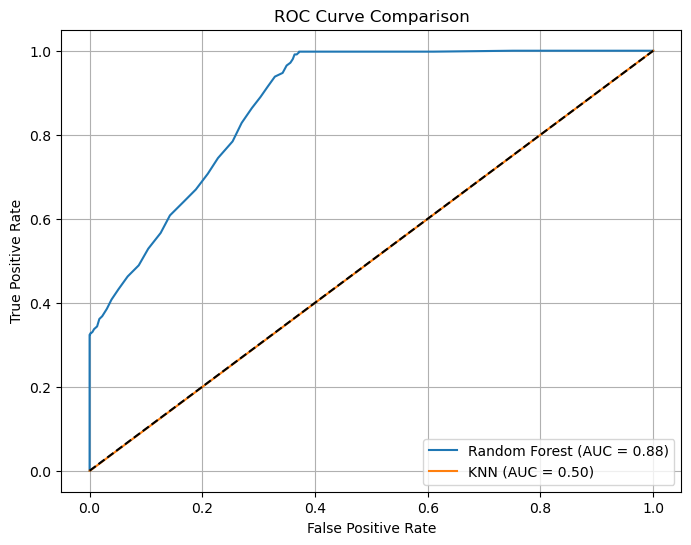

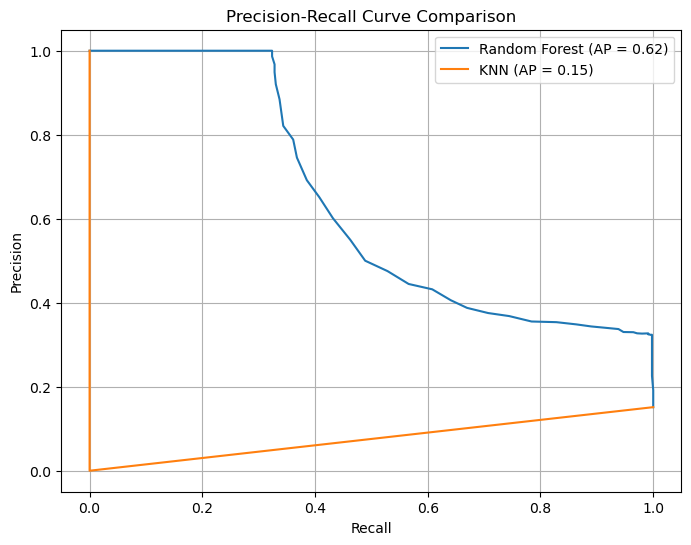

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score,
                             confusion_matrix, classification_report,
                             precision_recall_curve, roc_curve)

# Ensure arrays are contiguous in memory
def ensure_contiguous(array):
    return np.ascontiguousarray(array) if array is not None else None

# Prepare data
x_train_cont = ensure_contiguous(x_train)
y_train_cont = ensure_contiguous(y_train)
x_test_cont = ensure_contiguous(x_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

results = []
predictions = {}

# Train, predict, and evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train_cont, y_train_cont)
    y_pred = model.predict(x_test_cont)
    y_proba = model.predict_proba(x_test_cont)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_test)
    
    predictions[name] = y_pred

    # Store results
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1': f1_score(y_test, y_pred, zero_division=0),
        'ROC AUC': roc_auc_score(y_test, y_proba) if hasattr(model, "predict_proba") else None,
        'PR AUC': average_precision_score(y_test, y_proba) if hasattr(model, "predict_proba") else None
    }
    results.append(metrics)

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison Summary:")
print(results_df.to_string(index=False))

# Bar Plots
plt.figure(figsize=(14, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC']
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Confusion Matrices
plt.figure(figsize=(12, 4))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 2, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test_cont)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test_cont)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        ap_score = average_precision_score(y_test, y_proba)
        plt.plot(recall, precision, label=f'{name} (AP = {ap_score:.2f})')
plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


#  Compare SVM vs Naive Bayes

In this step, we compare two classification models – **Support Vector Machine (SVM)** and **Naive Bayes** – to evaluate their ability to detect fraudulent transactions in our dataset.

# Why These Models?

- **SVM (Support Vector Machine)** tries to find the best boundary (hyperplane) that separates different classes. It's powerful for high-dimensional data but can be slow on large datasets.
- **Naive Bayes** is a probabilistic classifier based on Bayes’ theorem. It assumes feature independence and is very fast, though this assumption may not always hold in real-world data.

By comparing these models, we aim to observe the trade-off between **speed, simplicity, and performance**.



Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2546
           1       0.00      0.00      0.00       454

    accuracy                           0.85      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.72      0.85      0.78      3000


Training Naive Bayes...

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2546
           1       0.94      0.04      0.07       454

    accuracy                           0.85      3000
   macro avg       0.90      0.52      0.50      3000
weighted avg       0.87      0.85      0.79      3000


Model Comparison Summary:
      Model  Accuracy  Precision   Recall       F1  ROC AUC   PR AUC
        SVM  0.848667   0.000000 0.000000 0.000000 0.550272 0.177861
Naive Bayes  0.854000   0.944444 0.037445 0.072034 0.842406 0.479447


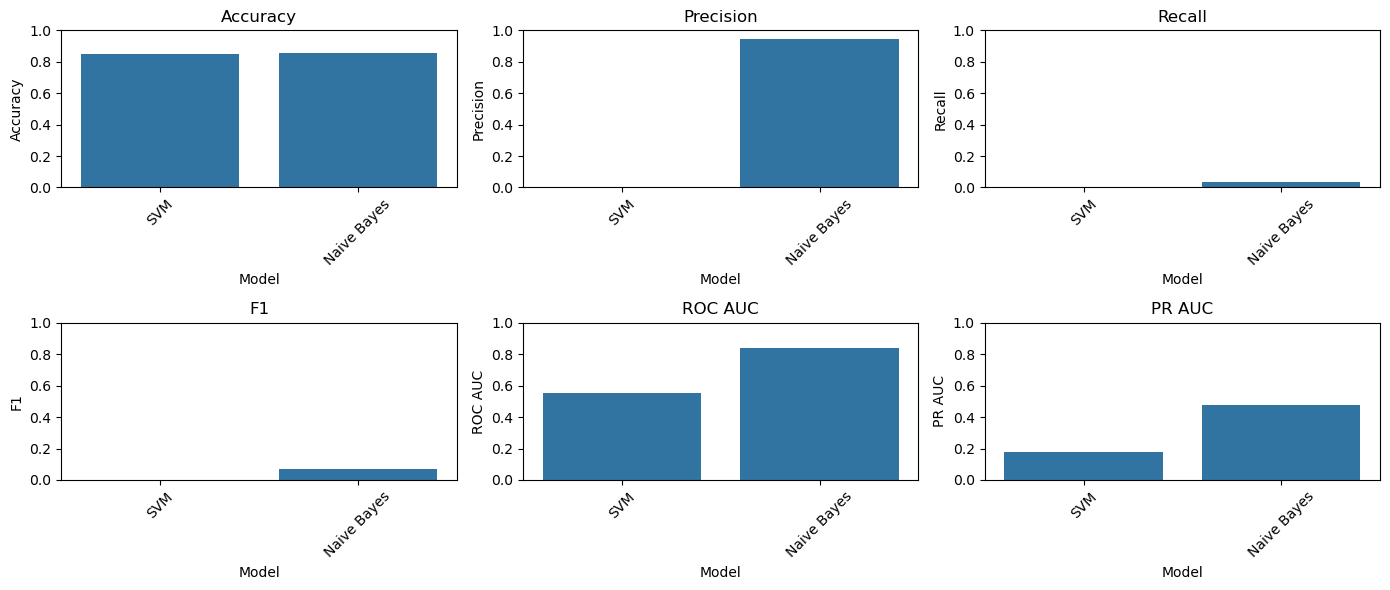

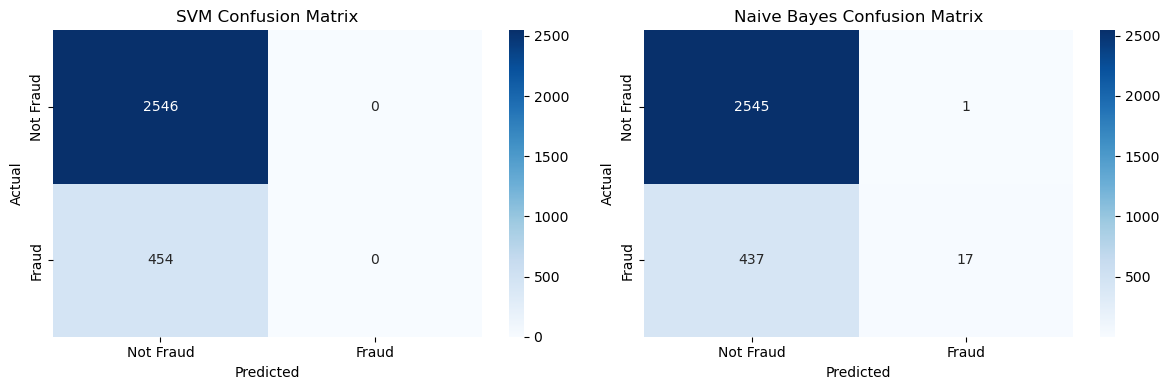

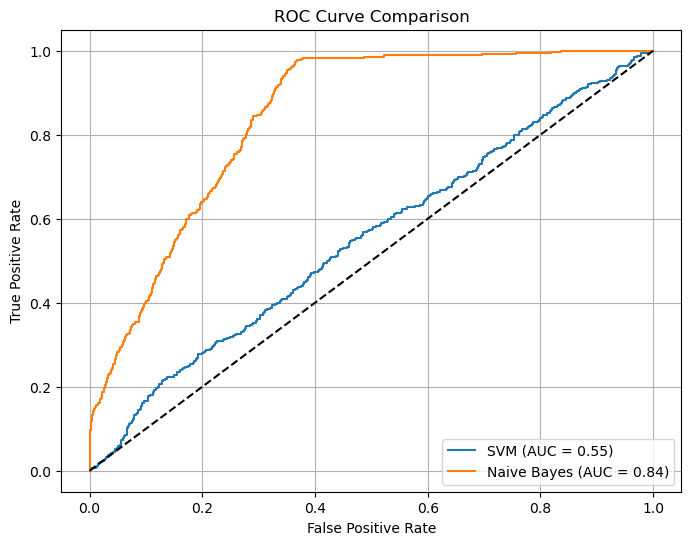

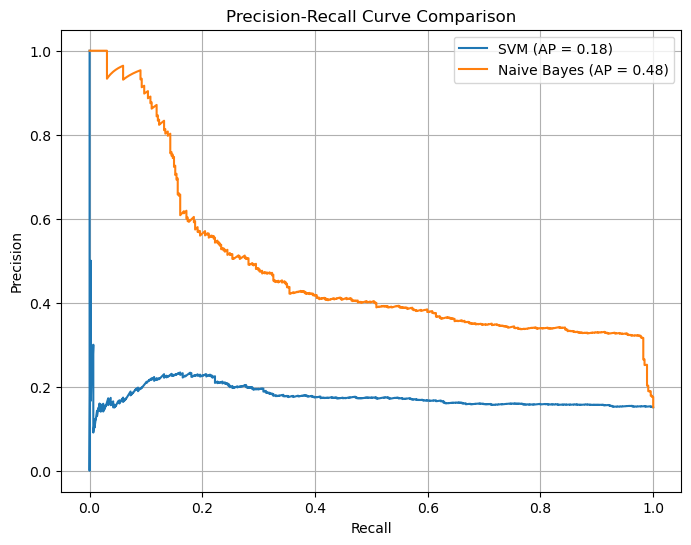

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, average_precision_score,
                             confusion_matrix, classification_report,
                             roc_curve, precision_recall_curve)

# Initialize models
models = {
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

results = []
predictions = {}

# Train, predict, and evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_test)

    predictions[name] = y_pred

    # Calculate metrics
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1': f1_score(y_test, y_pred, zero_division=0),
        'ROC AUC': roc_auc_score(y_test, y_proba) if hasattr(model, "predict_proba") else None,
        'PR AUC': average_precision_score(y_test, y_proba) if hasattr(model, "predict_proba") else None
    }
    results.append(metrics)

    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# Results table
results_df = pd.DataFrame(results)
print("\nModel Comparison Summary:")
print(results_df.to_string(index=False))

# Plot bar charts for metrics
plt.figure(figsize=(14, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC']
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Confusion Matrices
plt.figure(figsize=(12, 4))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 2, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        ap_score = average_precision_score(y_test, y_proba)
        plt.plot(recall, precision, label=f'{name} (AP = {ap_score:.2f})')
plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


# Compare Gradient Boosting & XGBoost

In this step, we compare two powerful **ensemble learning techniques**:  
**Gradient Boosting Classifier (GB)** and **Extreme Gradient Boosting (XGBoost)** to evaluate their performance on the fraud detection task.

# What is Gradient Boosting?
Gradient Boosting is an ensemble technique that builds models sequentially.  
Each new model tries to correct the errors of the previous one by minimizing a loss function.

- It uses decision trees as base learners.
- Focuses on **gradually improving performance**.
- Can be slower than XGBoost but still very effective.

# What is XGBoost?
XGBoost is an optimized version of Gradient Boosting. It's faster and often gives better accuracy.  
It's designed for **speed and performance**.

- Handles missing values internally.
- Includes regularization (to avoid overfitting).
- Parallel computation makes it faster than traditional Gradient Boosting.


Training Gradient Boosting...

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2546
           1       0.37      0.77      0.50       454

    accuracy                           0.77      3000
   macro avg       0.66      0.77      0.68      3000
weighted avg       0.86      0.77      0.80      3000


Training XGBoost...

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2546
           1       0.68      0.38      0.49       454

    accuracy                           0.88      3000
   macro avg       0.79      0.67      0.71      3000
weighted avg       0.86      0.88      0.86      3000


Model Comparison Summary:
            Model  Accuracy  Precision   Recall  F1 Score  ROC AUC   PR AUC
Gradient Boosting  0.768667   0.371795 0.766520  0.500719 0.877457 0.634796
          XGBoost  0.878667   0.677165 0.

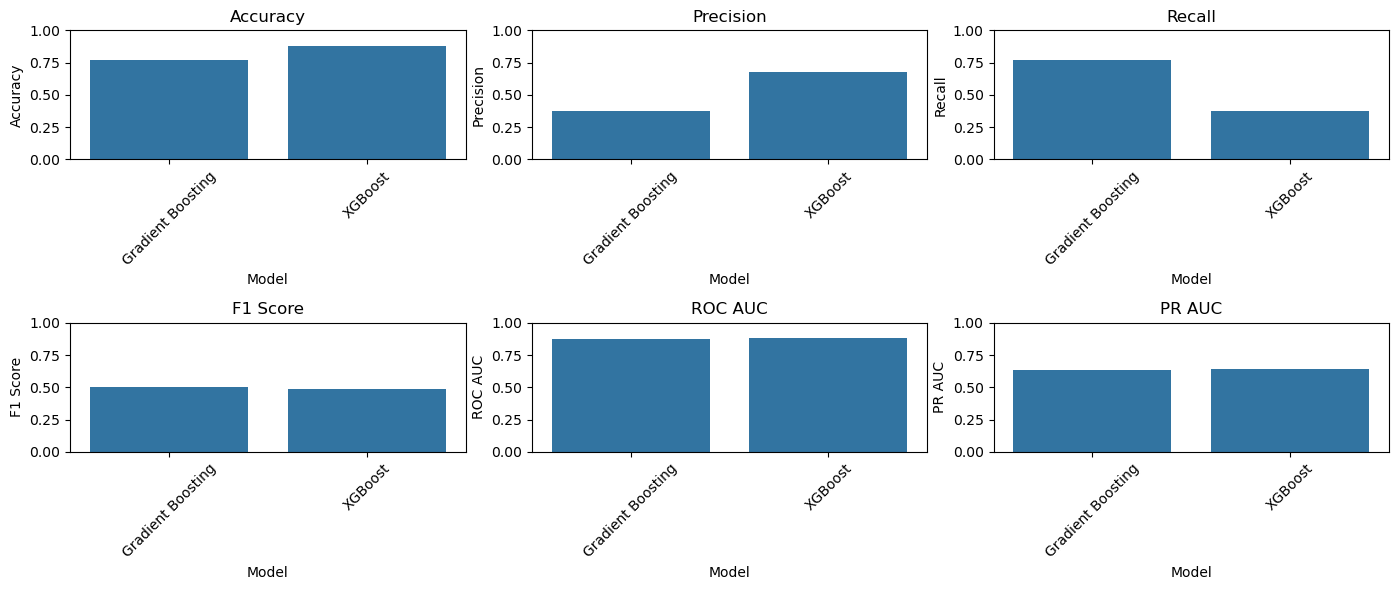

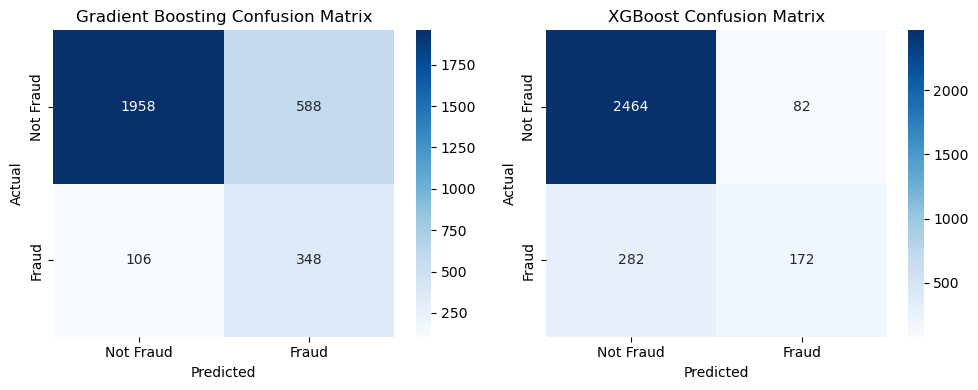

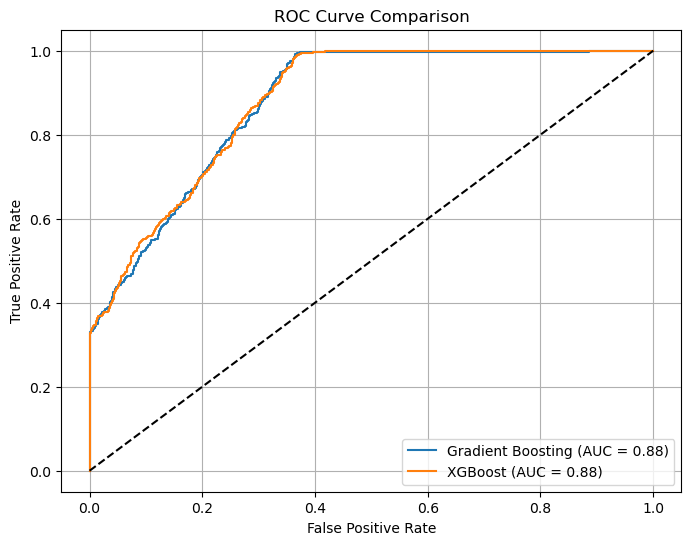

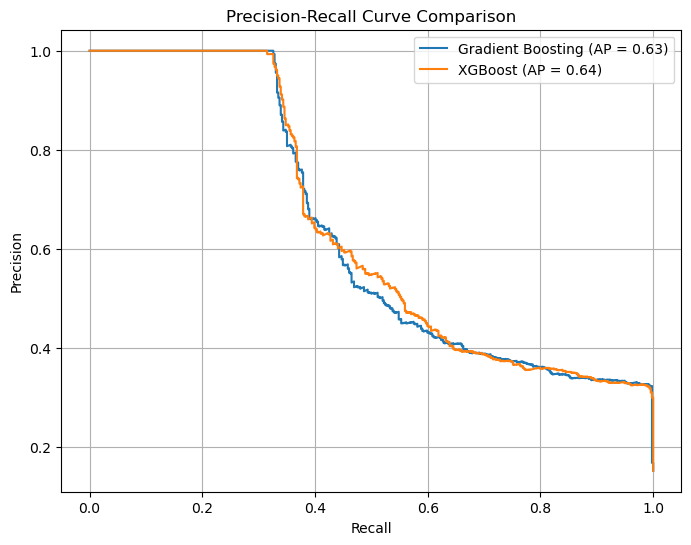

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, roc_auc_score,
                             average_precision_score, confusion_matrix,
                             roc_curve, precision_recall_curve)

# Initialize models
models = {
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = []
predictions = {}

# Train, predict, and evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else [0]*len(y_test)
    
    predictions[name] = y_pred

    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred, zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, zero_division=0),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'PR AUC': average_precision_score(y_test, y_proba)
    }
    results.append(metrics)

    # Classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# Create a DataFrame for results
results_df = pd.DataFrame(results)
print("\nModel Comparison Summary:")
print(results_df.to_string(index=False))

# Plot bar chart for metrics
plt.figure(figsize=(14, 6))
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'PR AUC'], 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Confusion matrices
plt.figure(figsize=(10, 4))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1, 2, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curve
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(x_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap_score = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f'{name} (AP = {ap_score:.2f})')
plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


# Why Are We Comparing Algorithms?

In this step, we're **training multiple models using different machine learning algorithms** and **comparing their performance**. This helps us find the most accurate and reliable model for our fraud detection problem.

# Algorithm vs. Model

**Algorithm** : A Method used to learn from data (e.g., Random Forest, XGBoost, Logistic Regression) |
**Model**:The trained output that learns patterns from the data using an algorithm |
**Model Comparison**: Evaluating the performance of different algorithms after they are trained on the same data |

# Why Compare Different Algorithms?

Each algorithm has strengths and weaknesses:

- Some detect hidden patterns better
- Some perform well with imbalanced data
- Some are better at generalizing and avoiding overfitting

By testing multiple models, we make sure we **don’t miss out on a better-performing solution**.

# Final Goal

For our fraud detection task, we aim to find the model that:

- Detects frauds accurately (High Recall)
- Avoids false alarms (High Precision)
- Has the best overall balance (F1 Score)

So, comparing algorithms helps us select the best tool for the job.



# Comparison Using Un-supervised Learning Model Isolation Forest 

Isolation Forest Evaluation

Accuracy Score: 0.8426666666666667

Confusion Matrix:
[[2522   24]
 [ 448    6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2546
           1       0.20      0.01      0.02       454

    accuracy                           0.84      3000
   macro avg       0.52      0.50      0.47      3000
weighted avg       0.75      0.84      0.78      3000



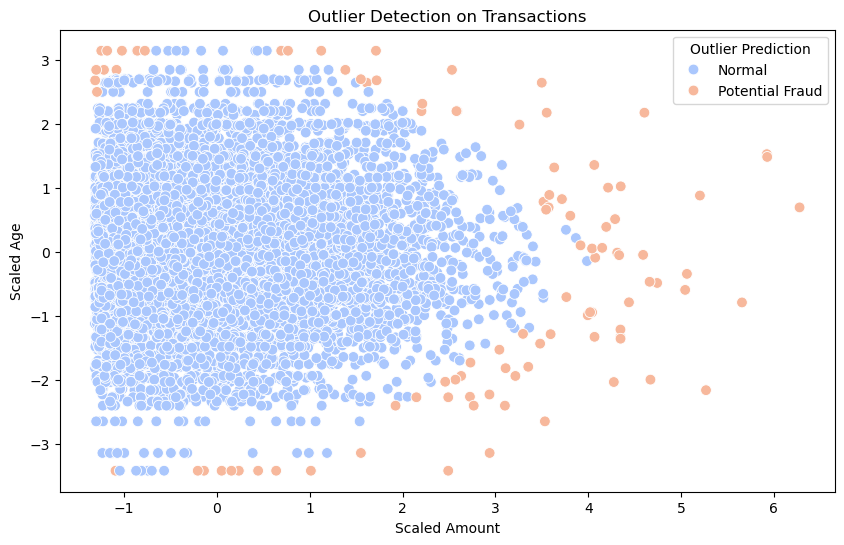

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_columns = ['TransactionAmount', 'CustomerAge']

# Scale the numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_columns])

# Apply Isolation Forest to identify anomalies on the test set
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # Set contamination rate to expected fraud rate

# Scale the numerical columns for the test set
X_test_scaled = scaler.transform(x_test[numerical_columns])

outlier_pred = iso_forest.fit_predict(X_test_scaled)

# Map the results (-1 for outliers, 1 for normal) to descriptive labels
outlier_mapping = {1: 'Normal', -1: 'Potential Fraud'}
x_test['Outlier_Prediction'] = pd.Series(outlier_pred, index=x_test.index).map(outlier_mapping)

# Convert Isolation Forest predictions to binary (1 for fraud, 0 for normal)
y_pred_binary = (outlier_pred == -1).astype(int)  # -1 indicates outliers (potential fraud)

# Convert the actual labels to binary (1 for fraud, 0 for normal)
y_test_binary = (y_test > 0).astype(int)  # Assuming positive values in y_test indicate fraud

# Evaluation
print("Isolation Forest Evaluation\n")
print("Accuracy Score:", accuracy_score(y_test_binary, y_pred_binary))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_binary, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_binary, zero_division=0))

# Plotting with isolation forest outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['Outlier_Prediction'], palette='coolwarm', s=60)
plt.title('Outlier Detection on Transactions')
plt.xlabel('Scaled Amount')
plt.ylabel('Scaled Age')
plt.legend(title='Outlier Prediction')
plt.show()


# Explanation of Functions Used: 

contamination=0.02 tells the model we expect around 2% frauds in the data.

fit() is training the model only on x_train (no labels needed).

predict() returns -1 for anomalies and 1 for normal — we just map it to 1 for fraud, 0 for non-fraud to match our format.

# Why use Isolation Forest USL Model ?

Isolation Forest is an anomaly detection algorithm that works by isolating observations. It randomly selects features and splits values between the maximum and minimum, aiming to isolate anomalies faster than normal points.

Fraudulent transactions are rare and different from the rest — which makes Isolation Forest a good fit to identify such outliers.


# Final Summary – Capstone Project: Fraud Detection in Financial Transactions

# Objective:
This project aims to build a machine learning model to "predict fraudulent transactions" using historical banking transaction data. The end goal is to help financial institutions reduce risk and take preventive action in real-time.

# Step-by-Step Breakdown:

# 1) Import Libraries & Load Dataset
- All essential Python libraries were imported (Pandas, NumPy, Scikit-learn, Matplotlib, Seaborn).
- The dataset `bank_transactions_expanded-Capstone Project.csv` was successfully loaded.

# 2) Exploratory Data Analysis (EDA)
- We explored the data using `.head()`, `.info()`, `.describe()`, and visual plots.
- Found missing values, class imbalance, and categorical features.
- Checked fraud distribution (target variable) – usually imbalanced in such datasets.

# 3) Data Cleaning & Preprocessing
- Dropped irrelevant columns such as `TransactionID`.
- Filled or dropped missing values appropriately.
- Categorical columns were encoded using **Ordinal Encoding** to make them suitable for ML.
- Checked for duplicates and removed if necessary.
- Verified all data types were ready for model input.

# 4) Train-Test Split
- Used `train_test_split` from Scikit-learn to split the data into:
  - 80% training data (`x_train`, `y_train`)
  - 20% testing data (`x_test`, `y_test`)

# 5) Model Training (Random Forest)
- Trained a `RandomForestClassifier` model using default parameters.
- Used `.fit()` method on the training data.

# 6) Model Evaluation
- Predicted on `x_test` and evaluated the performance using:
  - **Accuracy Score**
  - **Confusion Matrix**
  - **Classification Report (Precision, Recall, F1-Score)**
- **Helped assess how well the model identifies fraud vs. non-fraud.**

# 7) Feature Importance
- Identified top features contributing to fraud detection using `.feature_importances_`.
- Visualized using a horizontal bar chart.
- Helps in interpretability and understanding model behavior.

# 8) Cross-Validation
- Performed K-Fold cross-validation to ensure the model’s performance is stable across multiple data splits.
- Prevents overfitting or misleading accuracy due to a lucky train-test split.

# 9) Hyperparameter Tuning
- Grid Search or Randomized Search can be used to optimize parameters like `n_estimators`, `max_depth`, etc.
- Improves model performance significantly when tuned properly.

# 10) Comparing the Model using Different USL & SL Models:

1) Supervised Learning Models:Logistic Regression , Decision Tree , Random Forest , K-Nearest Neighbors (KNN) , Support Vector Machine (SVM), Naive Bayes, Gradient Boosting , XGBoost.

2) Unuspervised Learning Models : Isolation Forest & K-Means



# 11) Exporting the Model
- Saved the trained model using `joblib` for future deployment or use.
  - Can be loaded in a different application or API to make real-time fraud predictions.

---

## Final Thoughts:
This end-to-end pipeline demonstrates how to handle real-world messy data, apply ML techniques, evaluate them, and make them interpretable & deployable. Fraud detection is a **critical financial problem**, and ML-based solutions like this offer immense value by reducing loss and improving security.
